# Sistema de recomendación de recetas

#Instalación dependencias

In [ ]:
# Instalar las bibliotecas necesarias:
# rdflib: Para trabajar con datos RDF.
# owlrl: Para razonamiento OWL y aplicación de reglas.
# experta: Para construir sistemas expertos.
# scikit-fuzzy: Para operaciones de lógica difusa.
!pip install rdflib owlrl experta scikit-fuzzy

# Importar los módulos necesarios:
# numpy: Para cálculos numéricos.
import numpy as np
# skfuzzy: Para operaciones de lógica difusa.
import skfuzzy as fuzz
# control de skfuzzy: Para construir sistemas de control difuso.
from skfuzzy import control as ctrl

# Importar collections.abc para compatibilidad:
# Si collections no tiene Mapping, obtenerlo de collections.abc para versiones anteriores.
import collections.abc
if not hasattr(collections, 'Mapping'):
    collections.Mapping = collections.abc.Mapping

# Importar módulos para sistemas expertos y RDF:
# experta: Para definir reglas y hechos en sistemas expertos.
from experta import *
# rdflib: Para crear y manipular grafos RDF.
from rdflib import *

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.1/565.1 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 31.4 MB/s eta 0:00:00
  Created wheel for frozendict: filename=frozendict-1.2-py3-none-any.whl size=3149 sha256=4ed02e3f4e058cc2696ddc268f9043026c1de82b4941b2b9e3bec128a8ac9813
  Stored in directory: /root/.cache/pip/wheels/49/ac/f8/cb8120244e710bdb479c86198b03c7b08c3c2d3d2bf448fd6e
Successfully built frozendict
  Attempting uninstall: frozendict
    Found existing installation: frozendict 2.4.6
    Uninstalling frozendict-2.4.6:
      Successfully uninstalled frozendict-2.4.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yfinance 0.2.59 requires frozendict>=2.3.4, but you have frozendict 1.2 which is inc

#Ontología


## 🔍 Flujo General del Módulo de Ontología

 Este módulo utiliza tecnologías semánticas basadas en RDF y OWL para modelar, almacenar y razonar sobre recetas de cocina,
 incluyendo ingredientes, instrumentos, niveles de dificultad y tipos de cocina.
 A continuación, se describe paso a paso el proceso:


### 🔸 1. Inicialización del Grafo RDF
 Se crea un grafo RDF utilizando `rdflib.Graph()`. También se definen los namespaces utilizados en la ontología:
 - Namespace principal: http://pratica1.org/recetas#
 - FOAF y RDFS para herencia y atributos comunes

### 🔸 2. Definición del Esquema Ontológico
 Se definen clases clave como:
 - Receta, Postre, Desayuno, Almuerzo, Cena (y su jerarquía)
 - Ingrediente, TipoCocina, Instrumentos
 Se agregan relaciones jerárquicas con `RDFS.subClassOf` para representar herencia entre clases.

### 🔸 3. Creación de Propiedades
 Se modelan propiedades que vinculan recetas con otras entidades:
 - `tieneIngrediente`, `usaInstrumento`, `tiempoPreparacion`, `tieneDificultad`, `nivelPopularidad`, `perteneceA`, etc.
 Cada propiedad tiene:
 - Dominio (clase desde la cual parte)
 - Rango (clase o tipo de dato al que apunta)

### 🔸 4. Instanciación de Objetos
 Se crean instancias individuales (recursos concretos) para:
 - Recetas (Tacos, Pizza, Wontons, etc.)
 - Ingredientes, Instrumentos y Tipos de cocina
 Se les asignan propiedades como nombre, dificultad, tiempo, ingredientes, etc.

### 🔸 5. Inferencia Semántica (Razonamiento)
 Se aplica razonamiento automático con `owlrl` usando RDFS:
 - Se infieren relaciones implícitas como que los Postres también son Recetas
 - Se infieren propiedades jerárquicas (por ejemplo, subPropertyOf)

### 🔸 6. Consultas SPARQL
 Se realizan consultas SPARQL para recuperar recetas que cumplan ciertos criterios.
 Por ejemplo: recetas que pertenezcan a la CocinaItaliana.

### 🔸 7. Exportación del Grafo
 El grafo resultante se guarda en formato Turtle (`.ttl`) para su reutilización o análisis externo.

### 🔸 8. Uso en Sistema Híbrido
 La información inferida se combina con lógica difusa y reglas del sistema experto
 para generar recomendaciones personalizadas para el usuario.

### ✅ Resultado: un sistema semántico que organiza recetas de manera formal y permite inferencias y recomendaciones inteligentes.



In [ ]:
# Creación del grafo para la RDF
grafo = Graph()

#Definción del Namespaces
name = Namespace("http://pratica1.org/recetas#")
grafo.bind("ex", name)
grafo.bind("foaf", FOAF)
grafo.bind("rdfs", RDFS)

#Creación de clases
grafo.add((name.Receta, RDF.type, RDFS.Class))
grafo.add((name.Postre, RDF.type, RDFS.Class))
grafo.add((name.Desayuno, RDF.type, RDFS.Class))
grafo.add((name.Cena, RDF.type, RDFS.Class))
grafo.add((name.Almuerzo, RDF.type, RDFS.Class))
grafo.add((name.Ingrediente, RDF.type, RDFS.Class))
grafo.add((name.TipoCocina, RDF.type, RDFS.Class))
grafo.add((name.CocinaLatina, RDF.type, RDFS.Class))
grafo.add((name.CocinaEuropea, RDF.type, RDFS.Class))
grafo.add((name.CocinaOriental, RDF.type, RDFS.Class))
grafo.add((name.Instrumentos, RDF.type, RDFS.Class))

#Relaciones Jerarquícas
grafo.add((name.Postre, RDFS.subClassOf, name.Receta))
grafo.add((name.Desayuno, RDFS.subClassOf, name.Receta))
grafo.add((name.Cena, RDFS.subClassOf, name.Receta))
grafo.add((name.Almuerzo, RDFS.subClassOf, name.Receta))
grafo.add((name.CocinaLatina, RDFS.subClassOf, name.TipoCocina))
grafo.add((name.CocinaEuropea, RDFS.subClassOf, name.TipoCocina))
grafo.add((name.CocinaOriental, RDFS.subClassOf, name.TipoCocina))

#Definción de Propiedades

#Propiedad Tiene Ingrediente ('La receta tiene x ingrediente')
grafo.add((name.tieneIngrediente, RDF.type, RDF.Property))
grafo.add((name.tieneIngrediente, RDFS.domain, name.Receta))
grafo.add((name.tieneIngrediente, RDFS.range, name.Ingrediente))

#Propiedad Usa Instrumento ('La receta usa x instrumento')
grafo.add((name.usaInstrumento, RDF.type, RDF.Property))
grafo.add((name.usaInstrumento, RDFS.domain, name.Receta))
grafo.add((name.usaInstrumento, RDFS.range, name.Instrumentos))

#Propiedad Tiene nombre ('receta tiene x nombre')
grafo.add((name.tieneNombre, RDF.type, RDF.Property))
grafo.add((name.tieneNombre, RDFS.subPropertyOf, FOAF.name))
grafo.add((name.tieneNombre, RDFS.domain, name.Receta))
grafo.add((name.tieneNombre, RDFS.range, XSD.string))

#Propidad Tiempo de preparación ('La receta tiene x tiempo de preparación')
grafo.add((name.tiempoPreparacion, RDF.type, RDF.Property))
grafo.add((name.tiempoPreparacion, RDFS.domain, name.Receta))
grafo.add((name.tiempoPreparacion, RDFS.range, XSD.integer))

#Propiedad Tiene dificultad ('La receta tiene una dificultad x')
grafo.add((name.tieneDificultad, RDF.type, RDF.Property))
grafo.add((name.tieneDificultad, RDFS.domain, name.Receta))
grafo.add((name.tieneDificultad, RDFS.range, XSD.integer)) #Un entero de 1 a 10

#Propiedad nivel popularidad ('La receta tiene x nivel de popularidad')
grafo.add((name.nivelPopularidad, RDF.type, RDF.Property))
grafo.add((name.nivelPopularidad, RDFS.domain, name.Receta))
grafo.add((name.nivelPopularidad, RDFS.range, XSD.integer)) #Un entero de 1 a 10

#Propiedad Pertenece a ('La receta pertenece a x tipo de cocina')
grafo.add((name.perteneceA, RDF.type, RDF.Property))
grafo.add((name.perteneceA, RDFS.domain, name.Receta))
grafo.add((name.perteneceA, RDFS.range, name.TipoCocina))

#Propiedad Momento del día ('La receta es para x momento del día')
grafo.add((name.momentoDia, RDF.type, RDF.Property))
grafo.add((name.momentoDia, RDFS.domain, name.Receta))
grafo.add((name.momentoDia, RDFS.range, XSD.string)) #Un valor de la lista: Mañana, MedioDia, Tarde y Noche

#Propiedad Tiene Instrucciones ('La receta tiene x instrucciones')
grafo.add((name.tieneInstrucciones, RDF.type, RDF.Property))
grafo.add((name.tieneInstrucciones, RDFS.domain, name.Receta))
grafo.add((name.tieneInstrucciones, RDFS.range, XSD.string))

#Propiedad UsaInstrumentoEspecial ('La receta usa x instrumento especial')
grafo.add((name.usaInstrumentoEspecial, RDF.type, RDF.Property))
grafo.add((name.usaInstrumentoEspecial, RDFS.subPropertyOf, name.usaInstrumento))
grafo.add((name.usaInstrumentoEspecial, RDFS.domain, name.Receta))
grafo.add((name.usaInstrumentoEspecial, RDFS.range, name.Instrumentos))

<Graph identifier=N9b49b0780f4f43c7b8dba30e97337750 (<class 'rdflib.graph.Graph'>)>

In [ ]:
#Objetos tipo Receta
grafo.add((name.Hamburguesa, RDF.type, name.Receta))
grafo.add((name.PerritodeTofu, RDF.type, name.Receta))
grafo.add((name.Macedonia, RDF.type, name.Receta))
grafo.add((name.Sushiburrito, RDF.type, name.Receta))

#Los objetos tipo Postre, Desayuno, Cena y Almuerzo se infieren también son tipos de recetas, porque esas clases son subclases de la clase receta (Caso 1)

#Objetos tipo Postre
grafo.add((name.Tiramisú, RDF.type, name.Postre))
grafo.add((name.Brigadeiros, RDF.type, name.Postre))
grafo.add((name.BrazodeReina, RDF.type, name.Postre))
grafo.add((name.RolloDeCanela, RDF.type, name.Postre))

#Objetos tipo Desayuno
grafo.add((name.HuevosAliñados, RDF.type, name.Desayuno))
grafo.add((name.DesayunoInglés, RDF.type, name.Desayuno))
grafo.add((name.Arepa, RDF.type, name.Desayuno))
grafo.add((name.TostadasFrancesas, RDF.type, name.Desayuno))
grafo.add((name.Wontons, RDF.type, name.Desayuno))

#Objetos tipo Cena
grafo.add((name.PolloFritoPicante, RDF.type, name.Cena))
grafo.add((name.TapasEspañolas, RDF.type, name.Cena))
grafo.add((name.EnsaladaCésar, RDF.type, name.Cena))
grafo.add((name.TofuConCurryRojo, RDF.type, name.Cena))
grafo.add((name.Pizza, RDF.type, name.Cena))

#Objetos tipo Almuerzo
grafo.add((name.Tacos, RDF.type, name.Almuerzo))
grafo.add((name.PastaCarbonara, RDF.type, name.Almuerzo))
grafo.add((name.Sushi, RDF.type, name.Almuerzo))
grafo.add((name.Causa, RDF.type, name.Almuerzo))

#Objetos tipo Ingrediente
grafo.add((name.Huevos, RDF.type, name.Ingrediente))
grafo.add((name.Leche, RDF.type, name.Ingrediente))
grafo.add((name.Pollo, RDF.type, name.Ingrediente))
grafo.add((name.Azúcar, RDF.type, name.Ingrediente))
grafo.add((name.Cereal, RDF.type, name.Ingrediente))
grafo.add((name.Yogur, RDF.type, name.Ingrediente))
grafo.add((name.Pasta, RDF.type, name.Ingrediente))
grafo.add((name.Carne, RDF.type, name.Ingrediente))
grafo.add((name.Arroz, RDF.type, name.Ingrediente))
grafo.add((name.Naranja, RDF.type, name.Ingrediente))
grafo.add((name.Cebolla, RDF.type, name.Ingrediente))
grafo.add((name.Harina, RDF.type, name.Ingrediente))
grafo.add((name.Lechuga, RDF.type, name.Ingrediente))
grafo.add((name.Papa, RDF.type, name.Ingrediente))
grafo.add((name.Canela, RDF.type, name.Ingrediente))
grafo.add((name.Alga, RDF.type, name.Ingrediente))
grafo.add((name.Queso, RDF.type, name.Ingrediente))
grafo.add((name.Sal, RDF.type, name.Ingrediente))
grafo.add((name.Masa, RDF.type, name.Ingrediente))
grafo.add((name.FrutasVariadas, RDF.type, name.Ingrediente))
grafo.add((name.Aceite, RDF.type, name.Ingrediente))
grafo.add((name.SalsaTomate, RDF.type, name.Ingrediente))
grafo.add((name.Jengibre, RDF.type, name.Ingrediente))
grafo.add((name.Verduras, RDF.type, name.Ingrediente))

#Objetos tipo TipoCocina
grafo.add((name.CocinaFusion, RDF.type, name.TipoCocina))
grafo.add((name.CocinaEstadounidense, RDF.type, name.TipoCocina))
grafo.add((name.CocinaVegetariana, RDF.type, name.TipoCocina))
grafo.add((name.CocinaVegana, RDF.type, name.TipoCocina))

#Los objetos tipo CocinaLatina, CocinaEuropea y CocinaOriental se infieren también son tipos de cocina, porque esas clases son subclases de la clase TipoCocina (Caso 1)

#Objetos tipo CocinaLatina
grafo.add((name.CocinaMexciana, RDF.type, name.CocinaLatina))
grafo.add((name.CocinaColombiana, RDF.type, name.CocinaLatina))
grafo.add((name.CocinaBrasileña, RDF.type, name.CocinaLatina))
grafo.add((name.CocinaPeruana, RDF.type, name.CocinaLatina))

#Objetos tipo CocinaEuropea
grafo.add((name.CocinaFrancesa, RDF.type, name.CocinaEuropea))
grafo.add((name.CocinaItaliana, RDF.type, name.CocinaEuropea))
grafo.add((name.cocinaAlemana, RDF.type, name.CocinaEuropea))
grafo.add((name.CocinaEspañola, RDF.type, name.CocinaEuropea))

#Objetos tipo CocinaOriental
grafo.add((name.CocinaJaponesa, RDF.type, name.CocinaOriental))
grafo.add((name.CocinaCoreana, RDF.type, name.CocinaOriental))
grafo.add((name.CocinaTailandesa, RDF.type, name.CocinaOriental))
grafo.add((name.CocinaChina, RDF.type, name.CocinaOriental))

#Objetos tipo instrumento
grafo.add((name.Olla, RDF.type, name.Instrumentos))
grafo.add((name.Batidora, RDF.type, name.Instrumentos))
grafo.add((name.Cafetera, RDF.type, name.Instrumentos))
grafo.add((name.Horno, RDF.type, name.Instrumentos))
grafo.add((name.Sartén, RDF.type, name.Instrumentos))
grafo.add((name.Asador, RDF.type, name.Instrumentos))
grafo.add((name.FreidoraDeAire, RDF.type, name.Instrumentos))

<Graph identifier=N9b49b0780f4f43c7b8dba30e97337750 (<class 'rdflib.graph.Graph'>)>

In [ ]:
# Asignación de Propiedades

# Tacos
grafo.add((name.Tacos, name.tieneIngrediente, name.Cebolla))
grafo.add((name.Tacos, name.tiempoPreparacion, Literal(30, datatype=XSD.integer)))
grafo.add((name.Tacos, name.tieneDificultad, Literal(5, datatype=XSD.integer)))
grafo.add((name.Tacos, name.momentoDia, Literal("MedioDia", datatype=XSD.string)))
grafo.add(
    (name.Tacos, name.tieneNombre, Literal("Tacos al pastor", datatype=XSD.string))
)
grafo.add(
    (
        name.Tacos,
        name.tieneInstrucciones,
        Literal(
            "Marinar la carne, freírla y servir con cebolla en tortillas.",
            datatype=XSD.string,
        ),
    )
)
grafo.add((name.Tacos, name.usaInstrumento, name.Sartén))
grafo.add((name.Tacos, name.nivelPopularidad, Literal(9, datatype=XSD.integer)))
grafo.add((name.Tacos, name.perteneceA, name.CocinaMexciana))

# Wontons
grafo.add((name.Wontons, name.tieneIngrediente, name.Jengibre))
grafo.add((name.Wontons, name.tiempoPreparacion, Literal(45, datatype=XSD.integer)))
grafo.add((name.Wontons, name.tieneDificultad, Literal(7, datatype=XSD.integer)))
grafo.add((name.Wontons, name.momentoDia, Literal("Mañana", datatype=XSD.string)))
grafo.add(
    (
        name.Wontons,
        name.tieneNombre,
        Literal("Wontons rellenos de pollo y jengibre", datatype=XSD.string),
    )
)
grafo.add(
    (
        name.Wontons,
        name.tieneInstrucciones,
        Literal(
            "Rellenar las láminas con mezcla de pollo y jengibre, cocer al vapor.",
            datatype=XSD.string,
        ),
    )
)
grafo.add((name.Wontons, name.usaInstrumento, name.Olla))
grafo.add((name.Wontons, name.nivelPopularidad, Literal(7, datatype=XSD.integer)))
grafo.add((name.Wontons, name.perteneceA, name.CocinaTailandesa))

# Pizza
grafo.add((name.Pizza, name.tieneIngrediente, name.Queso))
grafo.add((name.Pizza, name.tiempoPreparacion, Literal(50, datatype=XSD.integer)))
grafo.add((name.Pizza, name.tieneDificultad, Literal(6, datatype=XSD.integer)))
grafo.add((name.Pizza, name.momentoDia, Literal("Noche", datatype=XSD.string)))
grafo.add(
    (name.Pizza, name.tieneNombre, Literal("Pizza margarita", datatype=XSD.string))
)
grafo.add(
    (
        name.Pizza,
        name.tieneInstrucciones,
        Literal(
            "Extender la masa, añadir salsa y queso, hornear 20 minutos.",
            datatype=XSD.string,
        ),
    )
)
grafo.add((name.Pizza, name.usaInstrumento, name.Sartén))
grafo.add((name.Pizza, name.nivelPopularidad, Literal(10, datatype=XSD.integer)))
grafo.add((name.Pizza, name.perteneceA, name.CocinaItaliana))

# Macedonia
grafo.add((name.Macedonia, name.tieneIngrediente, name.FrutasVariadas))
grafo.add((name.Macedonia, name.tiempoPreparacion, Literal(10, datatype=XSD.integer)))
grafo.add((name.Macedonia, name.tieneDificultad, Literal(2, datatype=XSD.integer)))
grafo.add((name.Macedonia, name.momentoDia, Literal("Tarde", datatype=XSD.string)))
grafo.add(
    (
        name.Macedonia,
        name.tieneNombre,
        Literal("Macedonia de frutas tropicales", datatype=XSD.string),
    )
)
grafo.add(
    (
        name.Macedonia,
        name.tieneInstrucciones,
        Literal(
            "Cortar frutas variadas y mezclarlas en un bowl con jugo de naranja.",
            datatype=XSD.string,
        ),
    )
)
grafo.add((name.Macedonia, name.usaInstrumento, name.Olla))
grafo.add((name.Macedonia, name.nivelPopularidad, Literal(8, datatype=XSD.integer)))
grafo.add((name.Macedonia, name.perteneceA, name.CocinaVegetariana))

# Rollo de Canela
grafo.add((name.RolloDeCanela, name.tieneIngrediente, name.Canela))
grafo.add(
    (name.RolloDeCanela, name.tiempoPreparacion, Literal(60, datatype=XSD.integer))
)
grafo.add((name.RolloDeCanela, name.tieneDificultad, Literal(8, datatype=XSD.integer)))
grafo.add((name.RolloDeCanela, name.momentoDia, Literal("Tarde", datatype=XSD.string)))
grafo.add(
    (
        name.RolloDeCanela,
        name.tieneNombre,
        Literal("Rollo de canela", datatype=XSD.string),
    )
)
grafo.add(
    (
        name.RolloDeCanela,
        name.tieneInstrucciones,
        Literal(
            "Estirar la mmasa del rollo, poner mmantequilla y canela, hornear por 30 minutos",
            datatype=XSD.string,
        ),
    )
)
grafo.add((name.RolloDeCanela, name.usaInstrumento, name.Batidora))
grafo.add((name.RolloDeCanela, name.nivelPopularidad, Literal(6, datatype=XSD.integer)))
grafo.add((name.RolloDeCanela, name.perteneceA, name.CocinaEuropea))

# Hamburguesa
grafo.add(
    (
        name.Hamburguesa,
        name.tieneNombre,
        Literal("Hamburguesa clásica", datatype=XSD.string),
    )
)
grafo.add((name.Hamburguesa, name.tieneIngrediente, name.Carne))
grafo.add((name.Hamburguesa, name.tiempoPreparacion, Literal(25, datatype=XSD.integer)))
grafo.add((name.Hamburguesa, name.tieneDificultad, Literal(3, datatype=XSD.integer)))
grafo.add((name.Hamburguesa, name.nivelPopularidad, Literal(10, datatype=XSD.integer)))
grafo.add((name.Hamburguesa, name.usaInstrumento, name.Sartén))
grafo.add((name.Hamburguesa, name.perteneceA, name.CocinaEstadounidense))
grafo.add((name.Hamburguesa, name.momentoDia, Literal("Noche", datatype=XSD.string)))
grafo.add(
    (
        name.Hamburguesa,
        name.tieneInstrucciones,
        Literal(
            "Formar las hamburguesas, cocinarlas en sartén y montar en pan.",
            datatype=XSD.string,
        ),
    )
)

# Perrito de tofu
grafo.add(
    (
        name.PerritodeTofu,
        name.tieneNombre,
        Literal("Perrito caliente vegano de tofu", datatype=XSD.string),
    )
)
grafo.add((name.PerritodeTofu, name.tieneIngrediente, name.TofuConCurryRojo))
grafo.add(
    (name.PerritodeTofu, name.tiempoPreparacion, Literal(20, datatype=XSD.integer))
)
grafo.add((name.PerritodeTofu, name.tieneDificultad, Literal(4, datatype=XSD.integer)))
grafo.add((name.PerritodeTofu, name.nivelPopularidad, Literal(6, datatype=XSD.integer)))
grafo.add((name.PerritodeTofu, name.usaInstrumento, name.Sartén))
grafo.add((name.PerritodeTofu, name.perteneceA, name.CocinaVegana))
grafo.add(
    (name.PerritodeTofu, name.momentoDia, Literal("MedioDia", datatype=XSD.string))
)
grafo.add(
    (
        name.PerritodeTofu,
        name.tieneInstrucciones,
        Literal(
            "Dorar el tofu, colocar en pan y añadir salsas veganas.",
            datatype=XSD.string,
        ),
    )
)

# Sushiburrito
grafo.add(
    (name.Sushiburrito, name.tieneNombre, Literal("Sushiburrito", datatype=XSD.string))
)
grafo.add((name.Sushiburrito, name.tieneIngrediente, name.Arroz))
grafo.add(
    (name.Sushiburrito, name.tiempoPreparacion, Literal(35, datatype=XSD.integer))
)
grafo.add((name.Sushiburrito, name.tieneDificultad, Literal(7, datatype=XSD.integer)))
grafo.add((name.Sushiburrito, name.nivelPopularidad, Literal(8, datatype=XSD.integer)))
grafo.add((name.Sushiburrito, name.usaInstrumento, name.Sartén))
grafo.add((name.Sushiburrito, name.perteneceA, name.CocinaFusion))
grafo.add(
    (name.Sushiburrito, name.momentoDia, Literal("MedioDia", datatype=XSD.string))
)
grafo.add(
    (
        name.Sushiburrito,
        name.tieneInstrucciones,
        Literal(
            "Rellenar alga nori con arroz y vegetales, enrollar como burrito.",
            datatype=XSD.string,
        ),
    )
)

# Tiramisú
grafo.add(
    (name.Tiramisú, name.tieneNombre, Literal("Tiramisú clásico", datatype=XSD.string))
)
grafo.add((name.Tiramisú, name.tiempoPreparacion, Literal(40, datatype=XSD.integer)))
grafo.add((name.Tiramisú, name.tieneDificultad, Literal(6, datatype=XSD.integer)))
grafo.add((name.Tiramisú, name.nivelPopularidad, Literal(9, datatype=XSD.integer)))
grafo.add((name.Tiramisú, name.usaInstrumento, name.Batidora))
grafo.add((name.Tiramisú, name.perteneceA, name.CocinaItaliana))
grafo.add((name.Tiramisú, name.momentoDia, Literal("Tarde", datatype=XSD.string)))
grafo.add(
    (
        name.Tiramisú,
        name.tieneInstrucciones,
        Literal(
            "Preparar mezcla de mascarpone y café, montar en capas y refrigerar.",
            datatype=XSD.string,
        ),
    )
)

# Brigadeiros
grafo.add(
    (name.Brigadeiros, name.tieneNombre, Literal("Brigadeiros", datatype=XSD.string))
)
grafo.add((name.Brigadeiros, name.tieneIngrediente, name.Azúcar))
grafo.add((name.Brigadeiros, name.tiempoPreparacion, Literal(20, datatype=XSD.integer)))
grafo.add((name.Brigadeiros, name.tieneDificultad, Literal(3, datatype=XSD.integer)))
grafo.add((name.Brigadeiros, name.nivelPopularidad, Literal(8, datatype=XSD.integer)))
grafo.add((name.Brigadeiros, name.usaInstrumento, name.Olla))
grafo.add((name.Brigadeiros, name.perteneceA, name.CocinaBrasileña))
grafo.add((name.Brigadeiros, name.momentoDia, Literal("Tarde", datatype=XSD.string)))
grafo.add(
    (
        name.Brigadeiros,
        name.tieneInstrucciones,
        Literal(
            "Mezclar leche condensada y cacao, dar forma, cubrir con granulado.",
            datatype=XSD.string,
        ),
    )
)

# Brazo de reina
grafo.add(
    (
        name.BrazodeReina,
        name.tieneNombre,
        Literal("Brazo de reina", datatype=XSD.string),
    )
)
grafo.add((name.BrazodeReina, name.tieneIngrediente, name.Harina))
grafo.add(
    (name.BrazodeReina, name.tiempoPreparacion, Literal(60, datatype=XSD.integer))
)
grafo.add((name.BrazodeReina, name.tieneDificultad, Literal(7, datatype=XSD.integer)))
grafo.add((name.BrazodeReina, name.nivelPopularidad, Literal(7, datatype=XSD.integer)))
grafo.add((name.BrazodeReina, name.usaInstrumento, name.Horno))
grafo.add((name.BrazodeReina, name.perteneceA, name.CocinaLatina))
grafo.add((name.BrazodeReina, name.momentoDia, Literal("Tarde", datatype=XSD.string)))
grafo.add(
    (
        name.BrazodeReina,
        name.tieneInstrucciones,
        Literal(
            "Preparar bizcocho, enrollar con relleno de dulce de leche",
            datatype=XSD.string,
        ),
    )
)

# Huevos Aliñados
grafo.add(
    (
        name.HuevosAliñados,
        name.tieneNombre,
        Literal("Huevos aliñados", datatype=XSD.string),
    )
)
grafo.add((name.HuevosAliñados, name.tieneIngrediente, name.Huevos))
grafo.add(
    (name.HuevosAliñados, name.tiempoPreparacion, Literal(15, datatype=XSD.integer))
)
grafo.add((name.HuevosAliñados, name.tieneDificultad, Literal(2, datatype=XSD.integer)))
grafo.add(
    (name.HuevosAliñados, name.nivelPopularidad, Literal(7, datatype=XSD.integer))
)
grafo.add((name.HuevosAliñados, name.usaInstrumento, name.Olla))
grafo.add((name.HuevosAliñados, name.perteneceA, name.CocinaEspañola))
grafo.add(
    (name.HuevosAliñados, name.momentoDia, Literal("Mañana", datatype=XSD.string))
)
grafo.add(
    (
        name.HuevosAliñados,
        name.tieneInstrucciones,
        Literal(
            "Cocer huevos y aliñar con aceite, vinagre y especias.", datatype=XSD.string
        ),
    )
)

# Desayuno inglés
grafo.add(
    (
        name.DesayunoInglés,
        name.tieneNombre,
        Literal("Desayuno inglés", datatype=XSD.string),
    )
)
grafo.add((name.DesayunoInglés, name.tieneIngrediente, name.Huevos))
grafo.add(
    (name.DesayunoInglés, name.tiempoPreparacion, Literal(25, datatype=XSD.integer))
)
grafo.add((name.DesayunoInglés, name.tieneDificultad, Literal(3, datatype=XSD.integer)))
grafo.add(
    (name.DesayunoInglés, name.nivelPopularidad, Literal(7, datatype=XSD.integer))
)
grafo.add((name.DesayunoInglés, name.usaInstrumento, name.Sartén))
grafo.add((name.DesayunoInglés, name.perteneceA, name.CocinaEuropea))
grafo.add(
    (name.DesayunoInglés, name.momentoDia, Literal("Mañana", datatype=XSD.string))
)
grafo.add(
    (
        name.DesayunoInglés,
        name.tieneInstrucciones,
        Literal(
            "Cocinar tocino, salchichas y huevos, servir con pan y tomate.",
            datatype=XSD.string,
        ),
    )
)

# Arepa
grafo.add(
    (name.Arepa, name.tieneNombre, Literal("Arepa venezolana", datatype=XSD.string))
)
grafo.add((name.Arepa, name.tieneIngrediente, name.Harina))
grafo.add((name.Arepa, name.tiempoPreparacion, Literal(20, datatype=XSD.integer)))
grafo.add((name.Arepa, name.tieneDificultad, Literal(2, datatype=XSD.integer)))
grafo.add((name.Arepa, name.nivelPopularidad, Literal(8, datatype=XSD.integer)))
grafo.add((name.Arepa, name.usaInstrumento, name.Sartén))
grafo.add((name.Arepa, name.perteneceA, name.CocinaColombiana))
grafo.add((name.Arepa, name.momentoDia, Literal("Mañana", datatype=XSD.string)))
grafo.add(
    (
        name.Arepa,
        name.tieneInstrucciones,
        Literal(
            "Formar arepas de harina y cocer en sartén por ambos lados.",
            datatype=XSD.string,
        ),
    )
)

# Tostadas francesas
grafo.add(
    (
        name.TostadasFrancesas,
        name.tieneNombre,
        Literal("Tostadas francesas", datatype=XSD.string),
    )
)
grafo.add((name.TostadasFrancesas, name.tieneIngrediente, name.Huevos))
grafo.add(
    (name.TostadasFrancesas, name.tiempoPreparacion, Literal(15, datatype=XSD.integer))
)
grafo.add(
    (name.TostadasFrancesas, name.tieneDificultad, Literal(2, datatype=XSD.integer))
)
grafo.add(
    (name.TostadasFrancesas, name.nivelPopularidad, Literal(8, datatype=XSD.integer))
)
grafo.add((name.TostadasFrancesas, name.usaInstrumento, name.Sartén))
grafo.add((name.TostadasFrancesas, name.perteneceA, name.CocinaFrancesa))
grafo.add(
    (name.TostadasFrancesas, name.momentoDia, Literal("Mañana", datatype=XSD.string))
)
grafo.add(
    (
        name.TostadasFrancesas,
        name.tieneInstrucciones,
        Literal(
            "Bañar pan en mezcla de huevo, freír en sartén y espolvorear canela.",
            datatype=XSD.string,
        ),
    )
)

# Pollo frito picante
grafo.add(
    (
        name.PolloFritoPicante,
        name.tieneNombre,
        Literal("Pollo frito picante", datatype=XSD.string),
    )
)
grafo.add((name.PolloFritoPicante, name.tieneIngrediente, name.Pollo))
grafo.add(
    (name.PolloFritoPicante, name.tiempoPreparacion, Literal(40, datatype=XSD.integer))
)
grafo.add(
    (name.PolloFritoPicante, name.tieneDificultad, Literal(5, datatype=XSD.integer))
)
grafo.add(
    (name.PolloFritoPicante, name.nivelPopularidad, Literal(8, datatype=XSD.integer))
)
grafo.add((name.PolloFritoPicante, name.usaInstrumento, name.FreidoraDeAire))
grafo.add((name.PolloFritoPicante, name.perteneceA, name.CocinaEstadounidense))
grafo.add(
    (name.PolloFritoPicante, name.momentoDia, Literal("Noche", datatype=XSD.string))
)
grafo.add(
    (
        name.PolloFritoPicante,
        name.tieneInstrucciones,
        Literal(
            "Marinar y empanizar pollo, freír hasta que esté dorado.",
            datatype=XSD.string,
        ),
    )
)

# Tapas Españolas
grafo.add(
    (
        name.TapasEspañolas,
        name.tieneNombre,
        Literal("Tapas españolas", datatype=XSD.string),
    )
)
grafo.add((name.TapasEspañolas, name.tieneIngrediente, name.Papa))
grafo.add(
    (name.TapasEspañolas, name.tiempoPreparacion, Literal(30, datatype=XSD.integer))
)
grafo.add((name.TapasEspañolas, name.tieneDificultad, Literal(4, datatype=XSD.integer)))
grafo.add(
    (name.TapasEspañolas, name.nivelPopularidad, Literal(8, datatype=XSD.integer))
)
grafo.add((name.TapasEspañolas, name.usaInstrumento, name.Sartén))
grafo.add((name.TapasEspañolas, name.perteneceA, name.CocinaEspañola))
grafo.add((name.TapasEspañolas, name.momentoDia, Literal("Noche", datatype=XSD.string)))
grafo.add(
    (
        name.TapasEspañolas,
        name.tieneInstrucciones,
        Literal(
            "Freír papas, cebolla y huevos en sartén para tortilla.",
            datatype=XSD.string,
        ),
    )
)

# Ensalada César
grafo.add(
    (
        name.EnsaladaCésar,
        name.tieneNombre,
        Literal("Ensalada César", datatype=XSD.string),
    )
)
grafo.add((name.EnsaladaCésar, name.tieneIngrediente, name.Lechuga))
grafo.add(
    (name.EnsaladaCésar, name.tiempoPreparacion, Literal(15, datatype=XSD.integer))
)
grafo.add((name.EnsaladaCésar, name.tieneDificultad, Literal(3, datatype=XSD.integer)))
grafo.add((name.EnsaladaCésar, name.nivelPopularidad, Literal(7, datatype=XSD.integer)))
grafo.add((name.EnsaladaCésar, name.usaInstrumento, name.Batidora))
grafo.add((name.EnsaladaCésar, name.perteneceA, name.CocinaEstadounidense))
grafo.add((name.EnsaladaCésar, name.momentoDia, Literal("Noche", datatype=XSD.string)))
grafo.add(
    (
        name.EnsaladaCésar,
        name.tieneInstrucciones,
        Literal(
            "Mezclar lechuga, aderezo y croutones para servir.", datatype=XSD.string
        ),
    )
)

# Tofu con curry rojo
grafo.add(
    (
        name.TofuConCurryRojo,
        name.tieneNombre,
        Literal("Tofu con curry rojo", datatype=XSD.string),
    )
)
grafo.add((name.TofuConCurryRojo, name.tieneIngrediente, name.TofuConCurryRojo))
grafo.add(
    (name.TofuConCurryRojo, name.tiempoPreparacion, Literal(20, datatype=XSD.integer))
)
grafo.add(
    (name.TofuConCurryRojo, name.tieneDificultad, Literal(5, datatype=XSD.integer))
)
grafo.add(
    (name.TofuConCurryRojo, name.nivelPopularidad, Literal(6, datatype=XSD.integer))
)
grafo.add((name.TofuConCurryRojo, name.usaInstrumento, name.Olla))
grafo.add((name.TofuConCurryRojo, name.perteneceA, name.CocinaTailandesa))
grafo.add(
    (name.TofuConCurryRojo, name.momentoDia, Literal("Noche", datatype=XSD.string))
)
grafo.add(
    (
        name.TofuConCurryRojo,
        name.tieneInstrucciones,
        Literal("Cocinar tofu con verduras y curry rojo en olla.", datatype=XSD.string),
    )
)

# Pasta Carbonara
grafo.add(
    (
        name.PastaCarbonara,
        name.tieneNombre,
        Literal("Pasta carbonara", datatype=XSD.string),
    )
)
grafo.add((name.PastaCarbonara, name.tieneIngrediente, name.Pasta))
grafo.add(
    (name.PastaCarbonara, name.tiempoPreparacion, Literal(25, datatype=XSD.integer))
)
grafo.add((name.PastaCarbonara, name.tieneDificultad, Literal(4, datatype=XSD.integer)))
grafo.add(
    (name.PastaCarbonara, name.nivelPopularidad, Literal(8, datatype=XSD.integer))
)
grafo.add((name.PastaCarbonara, name.usaInstrumento, name.Olla))
grafo.add((name.PastaCarbonara, name.perteneceA, name.CocinaItaliana))
grafo.add(
    (name.PastaCarbonara, name.momentoDia, Literal("MedioDia", datatype=XSD.string))
)
grafo.add(
    (
        name.PastaCarbonara,
        name.tieneInstrucciones,
        Literal("Cocer pasta y mezclar con salsa carbonara.", datatype=XSD.string),
    )
)

# Causa
grafo.add((name.Causa, name.tieneNombre, Literal("Causa limeña", datatype=XSD.string)))
grafo.add((name.Causa, name.tieneIngrediente, name.Papa))
grafo.add((name.Causa, name.tiempoPreparacion, Literal(30, datatype=XSD.integer)))
grafo.add((name.Causa, name.tieneDificultad, Literal(5, datatype=XSD.integer)))
grafo.add((name.Causa, name.nivelPopularidad, Literal(7, datatype=XSD.integer)))
grafo.add((name.Causa, name.usaInstrumento, name.Olla))
grafo.add((name.Causa, name.perteneceA, name.CocinaPeruana))
grafo.add((name.Causa, name.momentoDia, Literal("MedioDia", datatype=XSD.string)))
grafo.add(
    (
        name.Causa,
        name.tieneInstrucciones,
        Literal("Hervir papa y formar capas con atún y mayonesa.", datatype=XSD.string),
    )
)

# Sushi
grafo.add((name.Sushi, name.tieneNombre, Literal("Sushi", datatype=XSD.string)))
grafo.add((name.Sushi, name.tiempoPreparacion, Literal(30, datatype=XSD.integer)))
grafo.add((name.Sushi, name.tieneDificultad, Literal(5, datatype=XSD.integer)))
grafo.add((name.Sushi, name.nivelPopularidad, Literal(8, datatype=XSD.integer)))
grafo.add((name.Sushi, name.usaInstrumento, name.Horno))
grafo.add((name.Sushi, name.perteneceA, name.CocinaJaponesa))
grafo.add((name.Sushi, name.momentoDia, Literal("MedioDia", datatype=XSD.string)))
grafo.add(
    (
        name.Sushi,
        name.tieneInstrucciones,
        Literal("Cocer pescado y servir con arroz y aderezo.", datatype=XSD.string),
    )
)

<Graph identifier=N9b49b0780f4f43c7b8dba30e97337750 (<class 'rdflib.graph.Graph'>)>

In [ ]:
grafo.add((name.Tacos, name.tieneIngrediente, name.Carne))
grafo.add((name.Wontons, name.tieneIngrediente, name.Leche))
grafo.add((name.Pizza, name.tieneIngrediente, name.Harina))
grafo.add((name.Macedonia, name.tieneIngrediente, name.Naranja))

#Estas propiedades infirieron el dominio y el rango mediante la propiedad tieneIngrediente (Caso 2)
grafo.add((name.Tiramisú, name.tieneIngrediente, name.Café))
grafo.add((name.HuevosAliñados, name.tieneIngrediente, name.Tomate))
grafo.add((name.Sushi, name.tieneIngrediente, name.Pescado))
grafo.add((name.Hamburguesa, name.tieneIngrediente, name.Tocineta))

#Estas propiedades infieren otra propiedad dado que usa la jerarquía de propiedades (Caso 3)
grafo.add((name.Tacos, name.usaInstrumentoEspecial, name.Horno))
grafo.add((name.Wontons, name.usaInstrumentoEspecial, name.Asador))
grafo.add((name.Pizza, name.usaInstrumentoEspecial, name.Horno))
grafo.add((name.Brigadeiros, name.usaInstrumentoEspecial, name.Batidora))

<Graph identifier=N9b49b0780f4f43c7b8dba30e97337750 (<class 'rdflib.graph.Graph'>)>

In [ ]:
# Guardar el grafo en formato Turtle
grafo.serialize(destination="ontologia_recetas.ttl", format="turtle")

<Graph identifier=N9b49b0780f4f43c7b8dba30e97337750 (<class 'rdflib.graph.Graph'>)>

In [ ]:
from owlrl import DeductiveClosure, RDFS_Semantics

# Mostrar tamaño del grafo antes del razonamiento
print("Tripletas antes del razonamiento:", len(grafo))

# Ver las tripletas actuales:
print("\nEjemplo de tripletas en el grafo:")
for s, p, o in list(grafo)[-10:]:  # últimos 10 para ver los más recientes
    print(s, p, o)

Tripletas antes del razonamiento: 327

Ejemplo de tripletas en el grafo:
http://pratica1.org/recetas#Brigadeiros http://pratica1.org/recetas#tiempoPreparacion 20
http://pratica1.org/recetas#Causa http://pratica1.org/recetas#tieneNombre Causa limeña
http://pratica1.org/recetas#TapasEspañolas http://pratica1.org/recetas#tieneDificultad 4
http://pratica1.org/recetas#Brigadeiros http://pratica1.org/recetas#tieneDificultad 3
http://pratica1.org/recetas#Tiramisú http://pratica1.org/recetas#momentoDia Tarde
http://pratica1.org/recetas#usaInstrumento http://www.w3.org/2000/01/rdf-schema#range http://pratica1.org/recetas#Instrumentos
http://pratica1.org/recetas#tieneInstrucciones http://www.w3.org/2000/01/rdf-schema#range http://www.w3.org/2001/XMLSchema#string
http://pratica1.org/recetas#EnsaladaCésar http://pratica1.org/recetas#tieneInstrucciones Mezclar lechuga, aderezo y croutones para servir.
http://pratica1.org/recetas#TapasEspañolas http://pratica1.org/recetas#tiempoPreparacion 30
http:/

In [ ]:
# Copia antes de la deducción
original_triples = set(grafo)

# Aplicar el razonamiento RDFS
DeductiveClosure(RDFS_Semantics).expand(grafo)

# Mostrar tamaño del grafo después del razonamiento
print("Tripletas después del razonamiento:", len(grafo))

# Elimina triples donde el sujeto es literal (inválidos)
for s, p, o in list(grafo):
    if isinstance(s, Literal):
        grafo.remove((s, p, o))

# Ver los nuevos triples inferidos:
print("\nEjemplo de tripletas en el grafo:")
for s, p, o in list(grafo)[-10:]:  # últimos 10 para ver los más recientes
    print(s, p, o)

Tripletas después del razonamiento: 665

Ejemplo de tripletas en el grafo:
http://pratica1.org/recetas#Causa http://pratica1.org/recetas#tieneNombre Causa limeña
http://pratica1.org/recetas#Azúcar http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://www.w3.org/2000/01/rdf-schema#Resource
http://pratica1.org/recetas#Brigadeiros http://pratica1.org/recetas#tieneDificultad 3
http://pratica1.org/recetas#usaInstrumento http://www.w3.org/2000/01/rdf-schema#range http://pratica1.org/recetas#Instrumentos
http://pratica1.org/recetas#tieneInstrucciones http://www.w3.org/2000/01/rdf-schema#range http://www.w3.org/2001/XMLSchema#string
http://www.w3.org/2000/01/rdf-schema#range http://www.w3.org/2000/01/rdf-schema#subPropertyOf http://www.w3.org/2000/01/rdf-schema#range
http://pratica1.org/recetas#EnsaladaCésar http://pratica1.org/recetas#tieneInstrucciones Mezclar lechuga, aderezo y croutones para servir.
http://pratica1.org/recetas#TofuConCurryRojo http://www.w3.org/1999/02/22-rdf-syntax-ns#ty

In [ ]:
#Triples inferidas = nuevas menos las originales
inferidas = set(grafo) - original_triples

# Mostrar solo nuevas inferencias
print("Algunas tripletas nuevas:")
for i, triple in enumerate(inferidas):
    print(triple)
    if i == 9:
        break

Algunas tripletas nuevas:
(rdflib.term.URIRef('http://pratica1.org/recetas#BrazodeReina'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#Resource'))
(rdflib.term.URIRef('http://pratica1.org/recetas#Pollo'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#Resource'))
(rdflib.term.URIRef('http://pratica1.org/recetas#Receta'), rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#subClassOf'), rdflib.term.URIRef('http://pratica1.org/recetas#Receta'))
(rdflib.term.URIRef('http://pratica1.org/recetas#CocinaColombiana'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://pratica1.org/recetas#TipoCocina'))
(rdflib.term.URIRef('http://pratica1.org/recetas#PolloFritoPicante'), rdflib.term.URIRef('http://xmlns.com/foaf/0.1/name'), rdflib.term.Literal('Pollo frito picante', datatype=rdfli

In [ ]:
# Guardar el grafo en formato Turtle
grafo.serialize(destination="ontologia_recetas2.ttl", format="turtle")

<Graph identifier=N9b49b0780f4f43c7b8dba30e97337750 (<class 'rdflib.graph.Graph'>)>

#Logica difusa

## Flujo General del Módulo de Lógica Difusa

Este sistema utiliza lógica difusa para estimar el **nivel de esfuerzo físico y mental** que una receta requiere, tomando en cuenta características subjetivas del usuario. A continuación, se describe el proceso paso a paso:

---

### 🔸 1. Definición de Variables

Se definen tres **variables de entrada**:

- `tiempo` → Minutos disponibles (0–120)
- `habilidad` → Nivel de experiencia culinaria (0–10)
- `estado_ánimo` → Estado emocional (0–10)

Y una **variable de salida**:

- `esfuerzo` → Nivel de esfuerzo requerido (0–10)

Cada variable incluye **términos lingüísticos** (como “corto”, “medio”, “alto”) representados por funciones de membresía (trapezoidales, triangulares o gaussianas).

---

### 🔸 2. Modificadores Lingüísticos

Se aplican transformaciones difusas:

- `muy` → Eleva al cuadrado la membresía (más restrictivo)
- `ligeramente` → Aplica raíz cuadrada (más permisivo)

Esto permite expresar condiciones como **“muy motivado”** o **“ligeramente corto de tiempo”**.

---

## 🔸 3. Reglas Difusas

Se formulan **27 reglas tipo IF–THEN**, como por ejemplo:

- Si `tiempo` es **corto** o `habilidad` es **principiante**, entonces `esfuerzo` es **bajo**
- Si `estado_ánimo` es **muy motivado** y `habilidad` es **experto**, entonces `esfuerzo` es **alto**

Las reglas combinan condiciones con operadores difusos **AND**, **OR** y **NOT**.

---

### 🔸 4. Sistema de Inferencia

Se construye un **sistema de control difuso** con todas las reglas y variables.  
A través de este sistema, se pueden simular múltiples situaciones reales de usuario.

---

### 🔸 5. Entrada del Usuario

Se ingresan valores reales como:

- Tiempo disponible: `50` minutos
- Habilidad culinaria: `9`
- Estado de ánimo: `6`

Estos se transforman en valores difusos mediante sus funciones de pertenencia.

---

### 🔸 6. Defuzzificación

Se utiliza el **método del centroide** para convertir el resultado difuso en un valor numérico representativo del **nivel de esfuerzo total**.


In [ ]:
# Definición de variables de entrada
tiempo = ctrl.Antecedent(np.arange(0, 121, 1), 'tiempo')  # Tiempo disponible para cocinar (0-120 minutos)
habilidad = ctrl.Antecedent(np.arange(0, 11, 1), 'habilidad')  # Nivel de habilidad en la cocina (0-10)
estado_animo = ctrl.Antecedent(np.arange(0, 11, 1), 'estado_animo')  # Estado de ánimo del usuario (0-10)

# Definición de variable de salida
esfuerzo = ctrl.Consequent(np.arange(0, 11, 1), 'esfuerzo', defuzzify_method="centroid")  # Esfuerzo estimado para la receta (0-10)

# Funciones de pertenencia para 'tiempo'
tiempo['corto'] = fuzz.trapmf(tiempo.universe, [0, 0, 15, 30])  # Tiempo corto: 0-30 minutos, con mayor pertenencia entre 0-15
tiempo['medio'] = fuzz.trimf(tiempo.universe, [20, 45, 70])  # Tiempo medio: 20-70 minutos, con mayor pertenencia en 45
tiempo['largo'] = fuzz.trapmf(tiempo.universe, [60, 90, 120, 120])  # Tiempo largo: 60-120 minutos, con mayor pertenencia entre 90-120

# Funciones de pertenencia para 'habilidad'
habilidad['principiante'] = fuzz.gaussmf(habilidad.universe, 2, 1.5)  # Habilidad principiante: centrada en 2, con desviación estándar 1.5
habilidad['intermedio'] = fuzz.trimf(habilidad.universe, [3, 5, 7])  # Habilidad intermedia: 3-7, con mayor pertenencia en 5
habilidad['experto'] = fuzz.trapmf(habilidad.universe, [6, 8, 10, 10])  # Habilidad experto: centrada en 8, con desviación estándar 1.5

# Funciones de pertenencia para 'estado_animo'
estado_animo['estresado'] = fuzz.trapmf(estado_animo.universe, [0, 0, 3, 5])  # Estresado: 0-5, con mayor pertenencia entre 0-3
estado_animo['neutral'] = fuzz.trimf(estado_animo.universe, [3, 5, 7])  # Neutral: 3-7, con mayor pertenencia en 5
estado_animo['motivado'] = fuzz.trapmf(estado_animo.universe, [5, 8, 10, 10])  # Motivado: 5-10, con mayor pertenencia entre 8-10

# Funciones de pertenencia para 'esfuerzo'
esfuerzo['bajo'] = fuzz.trapmf(esfuerzo.universe, [0, 0, 4, 4])  # Esfuerzo bajo: 0-4, con mayor pertenencia en 0
esfuerzo['medio'] = fuzz.trimf(esfuerzo.universe, [2, 5, 8])  # Esfuerzo medio: 2-8, con mayor pertenencia en 5
esfuerzo['alto'] = fuzz.trapmf(esfuerzo.universe, [6, 8, 10, 10])  # Esfuerzo alto: 6-10, con mayor pertenencia en 10

In [ ]:
# Definición de modificadores lingüísticos
def muy(estado):
    """Intensifica la función de pertenencia elevandola al cuadrado"""
    return np.power(estado, 2)

def ligeramente(estado):
    """Atenua la función de pertenencia calculando su raiz cuadrada"""
    return np.sqrt(estado)

estado_animo['muy_motivado'] = muy(fuzz.trapmf(estado_animo.universe, [5, 8, 10, 10])) # Intensifica el estado de animo motivado
tiempo['ligeramente_corto'] = ligeramente(fuzz.trapmf(tiempo.universe, [0, 0, 15, 30])) # Atenua el tiempo corto
habilidad['muy_experto'] = muy(fuzz.trapmf(habilidad.universe, [6, 8, 10, 10]))# Intensifica la habilidad experto

In [ ]:
# 3) Reglas (27 en total, incluyendo algunas con operadores difusos)
rules = []

# Helper para crear la regla y añadirla
def R(ti, ha, esd, salida):
    rules.append(ctrl.Rule(tiempo[ti] & habilidad[ha] & estado_animo[esd],
                           esfuerzo[salida]))

# Tiempo corto
R('corto', 'principiante', 'estresado',  'bajo')
R('corto', 'principiante', 'motivado',     'medio')
R('corto', 'principiante', 'muy_motivado', 'medio')
rules.append(ctrl.Rule(tiempo['corto'] & habilidad['intermedio'] & ~estado_animo['motivado'], esfuerzo['bajo']))
R('corto', 'intermedio',   'motivado',     'medio')
R('corto', 'intermedio',   'muy_motivado', 'medio')
R('corto', 'experto',      'estresado',  'bajo')

# Tiempo medio
rules.append(ctrl.Rule(tiempo['corto'] & habilidad['experto'] & (estado_animo['motivado'] | estado_animo['muy_motivado']),esfuerzo['medio']))
R('medio', 'principiante', 'estresado',  'bajo')
R('medio', 'principiante', 'motivado',     'medio')
rules.append(ctrl.Rule(tiempo['medio'] & habilidad['principiante'] &~estado_animo['estresado'],esfuerzo['medio']))
R('medio', 'intermedio',   'estresado',  'bajo')
R('medio', 'intermedio',   'motivado',     'medio')
rules.append(ctrl.Rule(tiempo['medio'] & habilidad['intermedio'] & (estado_animo['muy_motivado'] | estado_animo['motivado']),esfuerzo['medio']))
R('medio', 'experto',      'estresado',  'medio')
rules.append(ctrl.Rule(tiempo['medio'] & habilidad['experto'] & ~estado_animo['estresado'],esfuerzo['medio']))
R('medio', 'experto',      'muy_motivado', 'alto')

# Tiempo largo
R('largo', 'principiante', 'estresado',  'medio')
R('largo', 'principiante', 'motivado',     'medio')
rules.append(ctrl.Rule(tiempo['largo'] & habilidad['principiante'] & (estado_animo['motivado'] | estado_animo['muy_motivado']),esfuerzo['medio']))
R('largo', 'intermedio',   'estresado',  'medio')
R('largo', 'intermedio',   'motivado',     'medio')
R('largo', 'intermedio',   'muy_motivado', 'alto')
rules.append(ctrl.Rule(tiempo['largo'] & habilidad['experto'] & ~estado_animo['motivado'],esfuerzo['medio']))
R('largo', 'experto',      'muy_motivado', 'alto')

In [ ]:
# Creación del sistema de control
sistema_control = ctrl.ControlSystem(rules)
sistema = ctrl.ControlSystemSimulation(sistema_control)

# Ejemplo de entrada
sistema.input['tiempo'] = 50  # minutos disponibles
sistema.input['habilidad'] = 9  # habilidad experta
sistema.input['estado_animo'] = 6  # motivado

# Ejecución del sistema
sistema.compute()

# Resultado
print(f"Nivel de esfuerzo estimado (0-10): {sistema.output['esfuerzo']:.2f}")

Nivel de esfuerzo estimado (0-10): 8.44


Método de defuzzificación
Se utiliza el método del centroide para la defuzzificación por las siguientes razones:

1. Representa todo el razonamiento difuso:

  Las decisiones en el sistema (como calcular el esfuerzo de cocina) se basan en múltiples reglas que pueden activarse parcialmente.

  El centroide integra toda la información, ponderando todas las reglas activadas.

2. Produce resultados suaves y realistas:

  En la cocina, no queremos decisiones abruptas (“alto” o “bajo” sin matices).

  El centroide devuelve valores intermedios como 6.3 o 4.8, que permiten adaptar la receta con flexibilidad.

3. Alineado con la experiencia humana:

  Cuando un usuario está "ligeramente estresado" y tiene "algo de tiempo", no espera una decisión binaria.

  El centroide modela este tipo de pensamiento difuso muy bien.

4. Equilibrio entre precisión y interpretabilidad:

  En comparación con métodos como el máximo (que solo escoge el pico más alto), el centroide equilibra todos los factores contribuyentes.

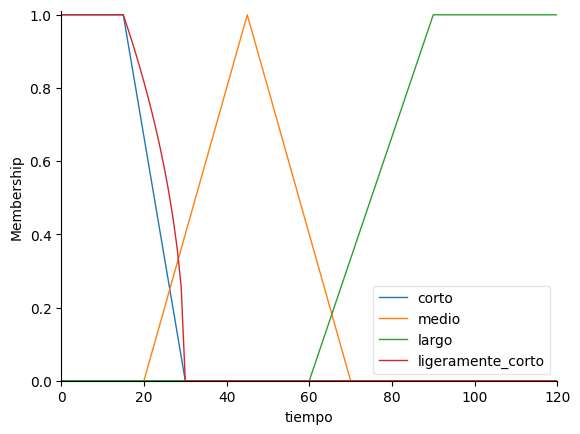

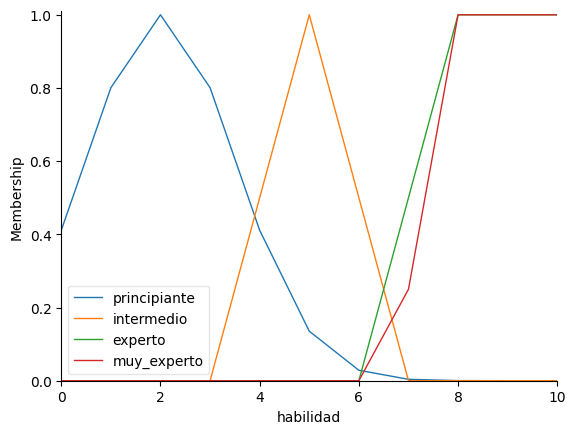

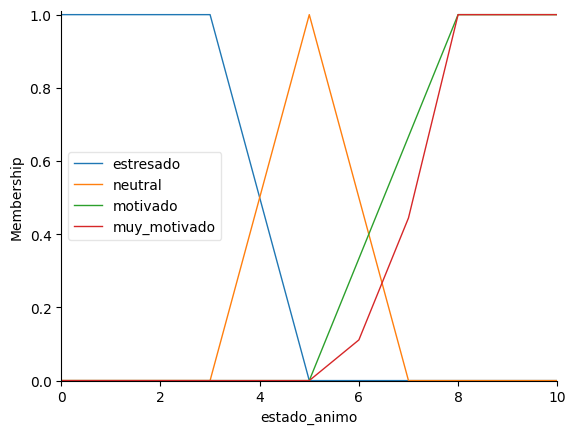

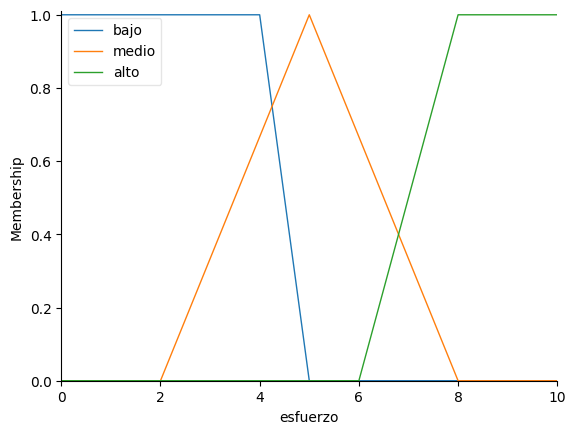

In [ ]:
#Gráfico de funciones de pertenencia
tiempo.view()
habilidad.view()
estado_animo.view()
esfuerzo.view()


#Sistema experto

---

## Flujo General del Sistema Experto de Recomendación de Recetas

Este sistema experto recomienda recetas basándose en las preferencias del usuario, datos de una ontología de recetas y una estimación del esfuerzo de cocina mediante lógica difusa.

---

### 💠 I. Inicialización y Carga de Conocimiento

1.  **Carga de la Ontología (`_cargar_grafo_ontologico`):**
    *   El sistema lee un archivo `ontologia_recetas2.ttl` que contiene la definición de recetas, ingredientes, tipos de cocina, etc.
    *   Estos datos se cargan en un grafo RDF.

2.  **Creación del Sistema de Lógica Difusa (`_crear_sistema_difuso`):**
    *   Se configura un subsistema de lógica difusa para estimar el "nivel de esfuerzo" que el usuario está dispuesto a invertir. (Ver detalle en Sección II).

3.  **Extracción de Hechos Base (`_cargar_hechos_base_ontologia`):**
    *   Al iniciar el motor, se recorre el grafo ontológico.
    *   Se declaran hechos iniciales en el motor de inferencia:
        *   `Receta(uri, nombre)`
        *   `EsTipoReceta(receta_uri, tipo)` (ej: Postre, PlatoPrincipal)
        *   `TieneIngrediente(receta_uri, ingrediente)`
        *   `UsaInstrumento(receta_uri, instrumento)`
        *   `PerteneceATipoCocina(receta_uri, tipo_cocina)` (incluye jerarquías, ej: CocinaItaliana es CocinaEuropea)
        *   `PropiedadReceta(receta_uri, propiedad, valor)` (ej: tiempoPreparacion, dificultad, momentoDia, nivelPopularidad)

---

### 🧠 II. Módulo de Lógica Difusa (Estimación de Esfuerzo)

Este módulo estima el **nivel de esfuerzo** que el usuario podría dedicar a cocinar.

1.  **Variables de Entrada:**
    *   `tiempo`: Tiempo disponible del usuario (0-120 min).
        *   Términos: `corto`, `medio`, `largo`.
    *   `habilidad`: Nivel de habilidad culinaria del usuario (0-10).
        *   Términos: `principiante`, `intermedio`, `experto`.
    *   `estado_animo`: Estado de ánimo del usuario (0-10).
        *   Términos: `estresado`, `neutral`, `motivado`.

2.  **Variable de Salida:**
    *   `esfuerzo`: Nivel de esfuerzo que la receta implicaría (0-10).
        *   Términos: `bajo`, `medio`, `alto`.

3.  **Modificadores Lingüísticos:**
    *   `muy`: Intensifica un término (ej: `muy_motivado`).
    *   `ligeramente`: Atenúa un término (ej: `ligeramente_corto`).

4.  **Reglas Difusas (11 reglas):**
    *   Combinan las variables de entrada para determinar el `esfuerzo`.
    *   Ejemplos:
        *   SI `tiempo` es `corto` O `habilidad` es `principiante` O `estado_animo` es `estresado` ENTONCES `esfuerzo` es `bajo`.
        *   SI `tiempo` es `largo` Y `habilidad` es `experto` Y `estado_animo` es `motivado` ENTONCES `esfuerzo` es `alto`.

5.  **Cálculo:**
    *   Se ingresan los valores del usuario para `tiempo`, `habilidad` y `estado_animo`.
    *   El sistema difuso calcula un valor numérico para `esfuerzo` (defuzzificación por centroide).
    *   Este valor se declara como un hecho `NivelEsfuerzoUsuario(valor)`.

---

### ⚙️ III. Proceso de Recomendación Principal (Método `recomendar`)

1.  **Entrada del Usuario:**
    *   `preferencias_list_of_dicts`: Lista de diccionarios con `criterio`, `valor` y `peso` (opcional).
    *   `tiempo_disponible`, `nivel_habilidad`, `nivel_animo`: Para el sistema difuso.

2.  **Cálculo de Esfuerzo Difuso:**
    *   Se invoca el módulo de lógica difusa (Sección II) con los parámetros del usuario.
    *   Se declara el hecho `NivelEsfuerzoUsuario`.

3.  **Reseteo y Declaración de Preferencias:**
    *   Se reinicia el motor (`self.reset()`).
    *   Los hechos base de la ontología se recargan.
    *   Las preferencias del usuario se declaran como hechos `PreferenciaUsuario(criterio, valor, operador, peso)`.

4.  **Ejecución del Motor de Inferencia (`self.run()`):**
    *   El motor evalúa todas las reglas definidas contra los hechos actuales (de la ontología y del usuario).

---

### 📜 IV. Reglas de Inferencia y Puntuación

Se aplican diversas reglas para puntuar las recetas. Cada regla que coincide declara o modifica un hecho `RecetaCandidata`.

*   **Coincidencia de Ingrediente Deseado:**
    *   Si `Receta` tiene `Ingrediente` y `PreferenciaUsuario` es `ingrediente_deseado`.
    *   Suma puntos (`+20 * peso`).
*   **Contiene Ingrediente No Deseado:**
    *   Si `Receta` tiene `Ingrediente` y `PreferenciaUsuario` es `ingrediente_no_deseado`.
    *   Resta puntos (`-100 * peso`).
*   **Coincidencia de Tipo de Cocina:**
    *   Si `Receta` `PerteneceATipoCocina` y `PreferenciaUsuario` es `tipo_cocina`.
    *   Suma puntos (`+15 * peso`).
*   **Coincidencia de Tipo de Receta:**
    *   Si `Receta` `EsTipoReceta` y `PreferenciaUsuario` es `tipo_receta`.
    *   Suma puntos (`+18 * peso`).
*   **Coincidencia de Momento del Día:**
    *   Si `PropiedadReceta` es `momentoDia` y coincide con `PreferenciaUsuario` de `momento_dia`.
    *   Suma puntos (`+10 * peso`).
*   **Cumple/Excede Tiempo Máximo:**
    *   Compara `PropiedadReceta` `tiempoPreparacion` con `PreferenciaUsuario` `tiempo_maximo`.
    *   Suma (`+10 * peso`) si es menor o igual, resta (`-50 * peso`) si es mayor.
*   **Cumple/Excede Dificultad Máxima (Explícita):**
    *   Compara `PropiedadReceta` `dificultad` con `PreferenciaUsuario` `dificultad_maxima`.
    *   Suma (`+5 * peso`) si es menor o igual, resta (`-30 * peso`) si es mayor.
*   **Compatibilidad con Esfuerzo Difuso:**
    *   Compara `PropiedadReceta` `dificultad` con el `NivelEsfuerzoUsuario` calculado.
    *   Suma (`+10`) si es compatible/menor, resta (`-5 * diferencia`) si es mayor.
*   **Usa Instrumento No Deseado:**
    *   Si `Receta` `UsaInstrumento` y `PreferenciaUsuario` es `instrumento_no_deseado`.
    *   Resta puntos (`-80 * peso`).
*   **Recompensa por Popularidad:**
    *   Si `PropiedadReceta` es `nivelPopularidad` > 0.
    *   Suma un pequeño bonus.
*   **Control y Mensajes:**
    *   Se usan hechos `EstadoConsulta` para evitar que una misma regla se dispare múltiples veces para la misma combinación de receta y preferencia.
    *   Reglas para `Info` si no se encuentran recetas.

---

### 🏆 V. Consolidación y Presentación de Resultados

1.  **Agregación de `RecetaCandidata`:**
    *   Se recorren todos los hechos `RecetaCandidata` generados.
    *   Para cada URI de receta única, se suman los puntajes y se coleccionan los motivos.
    *   Se obtiene la popularidad de la receta desde los hechos `PropiedadReceta`.

2.  **Filtrado y Formateo:**
    *   Se seleccionan solo las recetas con un puntaje consolidado >= 0.
    *   Se crea una lista de diccionarios con `uri`, `nombre`, `puntaje_final`, `motivos` (únicos y ordenados) y `popularidad`.

3.  **Ordenamiento:**
    *   Las sugerencias finales se ordenan:
        1.  Por `puntaje_final` (descendente).
        2.  Por `popularidad` (descendente, como criterio de desempate).

4.  **Salida:**
    *   Se devuelven las recetas sugeridas ordenadas.
    *   Opcionalmente, se declaran como hechos `RecetaSugerida`.
    *   Si no hay candidatas o ninguna alcanza el umbral, se informa al usuario y se devuelve una lista vacía.

---

In [ ]:
def localname(uri):
    """Devuelve el localname de una URI."""
    if not uri:
        return None
    return (
        uri.split("#")[-1]
        if "#" in uri
        else (uri.split("/")[-1] if "/" in uri else uri)
    )

In [ ]:
# --- INICIO DEL SISTEMA EXPERTO ---
class Receta(Fact):
    uri = Field(str, mandatory=True)
    nombre = Field(str, mandatory=True)
    pass


class EsTipoReceta(Fact):
    receta_uri = Field(str, mandatory=True)
    tipo = Field(str, mandatory=True)
    pass


class TieneIngrediente(Fact):
    receta_uri = Field(str, mandatory=True)
    ingrediente = Field(str, mandatory=True)
    pass


class UsaInstrumento(Fact):
    receta_uri = Field(str, mandatory=True)
    instrumento = Field(str, mandatory=True)
    pass


class PerteneceATipoCocina(Fact):
    receta_uri = Field(str, mandatory=True)
    tipo_cocina = Field(str, mandatory=True)
    pass


class PropiedadReceta(Fact):
    receta_uri = Field(str, mandatory=True)
    propiedad = Field(str, mandatory=True)
    valor = Field(lambda x: True, mandatory=True)
    pass


class PreferenciaUsuario(Fact):
    criterio = Field(str, mandatory=True)
    valor = Field(lambda x: True, mandatory=True)
    operador = Field(str, default="igual")
    peso = Field(int, default=1)
    pass


class RecetaCandidata(Fact):
    receta_uri = Field(str, mandatory=True)
    nombre = Field(str, mandatory=True)
    puntaje = Field(int, mandatory=True, default=0)
    motivos = Field(list, mandatory=True, default=[])
    pass


class RecetaSugerida(Fact):
    receta_uri = Field(str, mandatory=True)
    nombre = Field(str, mandatory=True)
    puntaje = Field(int, mandatory=True)
    motivos = Field(list, mandatory=True)
    popularidad = Field(int, default=0)
    pass


class Info(Fact):
    mensaje = Field(str, mandatory=True)
    pass


class EstadoConsulta(Fact):
    procesada = Field(str, mandatory=True)
    pass


class NivelEsfuerzoUsuario(Fact):
    valor = Field(float, mandatory=True)
    pass


class SistemaRecomendadorRecetas(KnowledgeEngine):
    def __init__(self):
        super().__init__()
        self.grafo_ontologico = self._cargar_grafo_ontologico()
        self.sistema_difuso = self._crear_sistema_difuso()

    def _crear_sistema_difuso(self):
        """
        Crea y configura el sistema difuso que estima el nivel de esfuerzo de cocina requerido
        para una receta, en función del tiempo disponible, habilidad y estado de ánimo del usuario.
        Define variables lingüísticas y sus funciones de pertenencia, así como las reglas del sistema.
        Devuelve la simulación del sistema de control.
        """

        # Definición de variables de entrada
        tiempo = ctrl.Antecedent(
            np.arange(0, 121, 1), "tiempo"
        )  # Tiempo disponible para cocinar (0-120 minutos)
        habilidad = ctrl.Antecedent(
            np.arange(0, 11, 1), "habilidad"
        )  # Nivel de habilidad en la cocina (0-10)
        estado_animo = ctrl.Antecedent(
            np.arange(0, 11, 1), "estado_animo"
        )  # Estado de ánimo del usuario (0-10)

        # Definición de variable de salida
        esfuerzo = ctrl.Consequent(
            np.arange(0, 11, 1), "esfuerzo", defuzzify_method="centroid"
        )  # Esfuerzo estimado para la receta (0-10)

        # Funciones de pertenencia para 'tiempo'
        tiempo["corto"] = fuzz.trapmf(
            tiempo.universe, [0, 0, 15, 30]
        )  # Tiempo corto: 0-30 minutos, con mayor pertenencia entre 0-15
        tiempo["medio"] = fuzz.trimf(
            tiempo.universe, [20, 45, 70]
        )  # Tiempo medio: 20-70 minutos, con mayor pertenencia en 45
        tiempo["largo"] = fuzz.trapmf(
            tiempo.universe, [60, 90, 120, 120]
        )  # Tiempo largo: 60-120 minutos, con mayor pertenencia entre 90-120

        # Funciones de pertenencia para 'habilidad'
        habilidad["principiante"] = fuzz.gaussmf(
            habilidad.universe, 2, 1.5
        )  # Habilidad principiante: centrada en 2, con desviación estándar 1.5
        habilidad["intermedio"] = fuzz.trimf(
            habilidad.universe, [3, 5, 7]
        )  # Habilidad intermedia: 3-7, con mayor pertenencia en 5
        habilidad["experto"] = fuzz.gaussmf(
            habilidad.universe, 8, 1.5
        )  # Habilidad experto: centrada en 8, con desviación estándar 1.5

        # Funciones de pertenencia para 'estado_animo'
        estado_animo['estresado'] = fuzz.trapmf(estado_animo.universe, [0, 0, 3, 5])  # Estresado: 0-5, con mayor pertenencia entre 0-3
        estado_animo['neutral'] = fuzz.trimf(estado_animo.universe, [3, 5, 7])  # Neutral: 3-7, con mayor pertenencia en 5
        estado_animo['motivado'] = fuzz.trapmf(estado_animo.universe, [5, 8, 10, 10])  # Motivado: 5-10, con mayor pertenencia entre 8-10

        # Funciones de pertenencia para 'esfuerzo'
        esfuerzo['bajo'] = fuzz.trapmf(esfuerzo.universe, [0, 0, 4, 4])  # Esfuerzo bajo: 0-4, con mayor pertenencia en 0
        esfuerzo['medio'] = fuzz.trimf(esfuerzo.universe, [2, 5, 8])  # Esfuerzo medio: 2-8, con mayor pertenencia en 5
        esfuerzo['alto'] = fuzz.trapmf(esfuerzo.universe, [6, 8, 10, 10])  # Esfuerzo alto: 6-10, con mayor pertenencia en 10

        # Definición de modificadores lingüísticos
        def muy(estado):
            """Intensifica la función de pertenencia elevandola al cuadrado"""
            return np.power(estado, 2)

        def ligeramente(estado):
            """Atenua la función de pertenencia calculando su raiz cuadrada"""
            return np.sqrt(estado)

        estado_animo["muy_motivado"] = muy(
            fuzz.trapmf(estado_animo.universe, [5, 8, 10, 10])
        )  # Intensifica el estado de animo motivado
        tiempo["ligeramente_corto"] = ligeramente(
            fuzz.trapmf(tiempo.universe, [0, 0, 15, 30])
        )  # Atenua el tiempo corto
        habilidad['muy_experto'] = muy(fuzz.trapmf(habilidad.universe, [6, 8, 10, 10])) # Intensifica la habilidad experto

        # 3) Reglas (27 en total: 3×3×3)
        rules = []

        # Helper para crear la regla y añadirla
        def R(ti, ha, esd, salida):
            rules.append(ctrl.Rule(tiempo[ti] & habilidad[ha] & estado_animo[esd],
                                  esfuerzo[salida]))

        # Tiempo corto
        R('corto', 'principiante', 'estresado',  'bajo')
        R('corto', 'principiante', 'motivado',     'medio')
        R('corto', 'principiante', 'muy_motivado', 'medio')
        rules.append(ctrl.Rule(tiempo['corto'] & habilidad['intermedio'] & ~estado_animo['motivado'], esfuerzo['bajo']))
        R('corto', 'intermedio',   'motivado',     'medio')
        R('corto', 'intermedio',   'muy_motivado', 'medio')
        R('corto', 'experto',      'estresado',  'bajo')

        # Tiempo medio
        rules.append(ctrl.Rule(tiempo['corto'] & habilidad['experto'] & (estado_animo['motivado'] | estado_animo['muy_motivado']),esfuerzo['medio']))
        R('medio', 'principiante', 'estresado',  'bajo')
        R('medio', 'principiante', 'motivado',     'medio')
        rules.append(ctrl.Rule(tiempo['medio'] & habilidad['principiante'] &~estado_animo['estresado'],esfuerzo['medio']))
        R('medio', 'intermedio',   'estresado',  'bajo')
        R('medio', 'intermedio',   'motivado',     'medio')
        rules.append(ctrl.Rule(tiempo['medio'] & habilidad['intermedio'] & (estado_animo['muy_motivado'] | estado_animo['motivado']),esfuerzo['medio']))
        R('medio', 'experto',      'estresado',  'medio')
        rules.append(ctrl.Rule(tiempo['medio'] & habilidad['experto'] & ~estado_animo['estresado'],esfuerzo['medio']))
        R('medio', 'experto',      'muy_motivado', 'alto')

        # Tiempo largo
        R('largo', 'principiante', 'estresado',  'medio')
        R('largo', 'principiante', 'motivado',     'medio')
        rules.append(ctrl.Rule(tiempo['largo'] & habilidad['principiante'] & (estado_animo['motivado'] | estado_animo['muy_motivado']),esfuerzo['medio']))
        R('largo', 'intermedio',   'estresado',  'medio')
        R('largo', 'intermedio',   'motivado',     'medio')
        R('largo', 'intermedio',   'muy_motivado', 'alto')
        rules.append(ctrl.Rule(tiempo['largo'] & habilidad['experto'] & ~estado_animo['motivado'],esfuerzo['medio']))
        R('largo', 'experto',      'muy_motivado', 'alto')

        # Creación del sistema de control
        sistema_control = ctrl.ControlSystem(rules)
        sistema = ctrl.ControlSystemSimulation(sistema_control)
        return sistema

    def _cargar_grafo_ontologico(self):
        """
        Carga el grafo de la ontología de recetas desde un archivo TTL.
        Devuelve el grafo parseado. Si ocurre algún error, imprime advertencia y retorna el grafo.
        """
        grafo = Graph()
        try:
            grafo.parse("ontologia_recetas2.ttl", format="ttl")
            print(f"Ontología cargada con {len(grafo)} triples")
        except Exception as e:
            print(f"Error al cargar la ontología: {e}")
            # Considerar si devolver un grafo vacío o lanzar una excepción
        return grafo

    @DefFacts()
    def _cargar_hechos_base_ontologia(self):
        """
        Lee el grafo ontológico cargado y transforma sus datos en hechos iniciales para el motor.
        Declara hechos de recetas, ingredientes, instrumentos, tipos, propiedades y jerarquías
        encontrados en la ontología. Este método se ejecuta automáticamente al arrancar el motor.
        """

        if not self.grafo_ontologico or len(self.grafo_ontologico) == 0:
             print("Advertencia: El grafo ontológico está vacío o no se cargó correctamente. No se generarán hechos.")
             return

        def localname(uri):
            uri_str = str(uri)
            if "#" in uri_str:
                return uri_str.split("#")[-1]
            return uri_str.split("/")[-1]

        print("Cargando hechos desde la ontología...")

        ex = Namespace("http://pratica1.org/recetas#")

        # 1. Obtener todas las recetas:
        recetas_uris = set()
        for s, p, o in self.grafo_ontologico:
            if p == RDF.type:
                # Se considera receta si:
                #   o es exactamente ex.Receta
                #   o es una subclase directa de ex.Receta,
                #   o (opcionalmente) se queran incluir cadenas de subclases, se puede mejorar
                # Verificamos que 'o' sea una URI antes de intentar la consulta de subclase
                if isinstance(o, URIRef) and (o == ex.Receta or ((o, RDFS.subClassOf, ex.Receta) in self.grafo_ontologico)):
                    recetas_uris.add(s)

        recetas_uris = list(recetas_uris)
        print(f"Total de {len(recetas_uris)} recetas encontradas en la ontología.")

        num_hechos_generados = 0

        # Función auxiliar para obtener detalles de la receta recorriendo el grafo
        def obtener_detalles_receta(grafo, receta_uri):
            detalles = {}
            # Se almacenan listas en caso de propiedades múltiples:
            detalles["ingredientes"] = []
            detalles["instrumentos"] = []
            # Se pueden guardar los tipos (clases) de la receta para distinguir subtipos
            tipos_instancia = set()

            for s, p, o in grafo.triples((receta_uri, None, None)):
                # Propiedades según el esquema de la ontología
                if p == ex.tieneNombre:
                    detalles["nombre"] = str(o)
                elif p == ex.tieneDificultad:
                    try:
                        # Intentar convertir a entero, si falla, mantener como string
                        detalles["dificultad"] = int(o)
                    except (ValueError, TypeError):
                         print(f"Advertencia: Valor de dificultad no numérico para {localname(receta_uri)}: '{o}'. Se tratará como string.")
                         detalles["dificultad"] = str(o)
                elif p == ex.tiempoPreparacion:
                    try:
                        detalles["tiempoPreparacion"] = int(o)
                    except (ValueError, TypeError):
                        print(f"Advertencia: Valor de tiempoPreparacion no numérico para {localname(receta_uri)}: '{o}'. Se tratará como string.")
                        detalles["tiempoPreparacion"] = str(o)
                elif p == ex.nivelPopularidad:
                    try:
                        detalles["nivelPopularidad"] = int(o)
                    except (ValueError, TypeError):
                        print(f"Advertencia: Valor de nivelPopularidad no numérico para {localname(receta_uri)}: '{o}'. Se tratará como string.")
                        detalles["nivelPopularidad"] = str(o)
                elif p == ex.momentoDia:
                     # Asegurarse que sea el nombre local si es una URI
                    detalles["momentoDia"] = localname(o) if isinstance(o, URIRef) else str(o)
                elif p == ex.perteneceA:
                    # Se espera que sea un tipo de cocina (URI)
                    if isinstance(o, URIRef):
                         detalles["tipoCocina"] = localname(o)
                    else:
                         print(f"Advertencia: 'perteneceA' no es una URI para {localname(receta_uri)}: '{o}'")
                elif p == ex.tieneIngrediente:
                    # Esperamos que sea el nombre local si es URI, o string si es Literal
                    detalles["ingredientes"].append(localname(o) if isinstance(o, URIRef) else str(o))
                elif p == ex.usaInstrumento:
                    detalles["instrumentos"].append(localname(o) if isinstance(o, URIRef) else str(o))

            # Además, obtener todas las clases (tipos) a las que la receta pertenece.
            # Esto incluye la clase ex.Receta y las subclases más específicas.
            for s, p, o in grafo.triples((receta_uri, RDF.type, None)):
                # Se registran todas las clases (solo URIs)
                if isinstance(o, URIRef):
                    tipos_instancia.add(o)
            detalles["tipos_instancia"] = tipos_instancia

            return detalles

        # Función auxiliar para obtener la jerarquía de tipos de cocina (superclases)
        def obtener_tipos_cocina_jerarquia(grafo, tipo_uri):
            tipos_superiores = set()
            # Se recorre el grafo para obtener las superclases directas (RDFS.subClassOf)
            # Asegurarse que tipo_uri es una URIRef
            if isinstance(tipo_uri, URIRef):
                for s, p, o in grafo.triples((tipo_uri, RDFS.subClassOf, None)):
                    # Solo añadir si 'o' también es una URI
                    if isinstance(o, URIRef):
                        tipos_superiores.add(o)
            # Opcional: se puede hacer recursión para obtener la cadena completa
            return tipos_superiores

        # Iterar sobre cada receta encontrada
        for receta_uri in recetas_uris:
            # Asegurarse que receta_uri es una URIRef válida
            if not isinstance(receta_uri, URIRef):
                print(f"Advertencia: Se encontró un sujeto de tipo Receta que no es una URI válida: {receta_uri}")
                continue

            detalles = obtener_detalles_receta(self.grafo_ontologico, receta_uri)

            # Verificar existencia de detalles esenciales (nombre)
            nombre_receta = detalles.get("nombre")
            if not nombre_receta or nombre_receta == "Nombre Desconocido":
                print(f"Advertencia: Se omite la receta {localname(receta_uri)} por falta de nombre.")
                continue

            # Usar la URI completa y validada
            receta_uri_actual = str(receta_uri) # Convertir a string para los hechos
            nombre_receta_actual = str(nombre_receta) # Asegurar que es string

            # Emitir hecho Receta
            yield Receta(uri=receta_uri_actual, nombre=nombre_receta_actual)
            num_hechos_generados += 1

            # Cargar Tipos de Receta (los datos de rdf:type)
            for t in detalles.get("tipos_instancia", []):
                # Evitar el genérico "Receta" si ya se tienen los específicos
                tipo_local = localname(t)
                if tipo_local != "Receta":
                    yield EsTipoReceta(receta_uri=receta_uri_actual, tipo=tipo_local)
                    num_hechos_generados += 1

            # Emitir hechos para ingredientes
            for ing in detalles.get("ingredientes", []):
                yield TieneIngrediente(receta_uri=receta_uri_actual, ingrediente=str(ing))
                num_hechos_generados += 1

            # Emitir hechos para instrumentos
            for inst in detalles.get("instrumentos", []):
                yield UsaInstrumento(receta_uri=receta_uri_actual, instrumento=str(inst))
                num_hechos_generados += 1

            # Cargar Tipos de Cocina (tanto el directo como la jerarquía)
            tipo_cocina_directo = detalles.get("tipoCocina")
            if tipo_cocina_directo:
                yield PerteneceATipoCocina(receta_uri=receta_uri_actual, tipo_cocina=tipo_cocina_directo)
                num_hechos_generados += 1

                # Buscar supertipos (por ejemplo, si "CocinaMexicana" es subclase de "CocinaLatina")
                # Se construye la URI completa a partir del namespace ex y el localname obtenido
                try:
                     # Construir URIRef usando el namespace y el nombre local
                    tipo_cocina_uri = ex[tipo_cocina_directo]
                    tipos_cocina_superiores = obtener_tipos_cocina_jerarquia(self.grafo_ontologico, tipo_cocina_uri)
                    for tc_super in tipos_cocina_superiores:
                        tc_super_local = localname(tc_super)
                        # Evitar el más genérico "TipoCocina" o si la URI no pertenece a 'ex'
                        if tc_super_local != "TipoCocina" and str(tc_super).startswith(str(ex)):
                            yield PerteneceATipoCocina(receta_uri=receta_uri_actual, tipo_cocina=tc_super_local)
                            num_hechos_generados += 1
                except Exception as e_ns:
                     print(f"Error al procesar jerarquía para tipo cocina '{tipo_cocina_directo}': {e_ns}")


            # Emitir propiedades de la receta, si están definidas y son válidas
            if "tiempoPreparacion" in detalles and isinstance(detalles["tiempoPreparacion"], int):
                yield PropiedadReceta(
                    receta_uri=receta_uri_actual,
                    propiedad="tiempoPreparacion",
                    valor=detalles["tiempoPreparacion"],
                )
                num_hechos_generados += 1
            if "dificultad" in detalles and isinstance(detalles["dificultad"], int):
                yield PropiedadReceta(
                    receta_uri=receta_uri_actual,
                    propiedad="dificultad",
                    valor=detalles["dificultad"],
                )
                num_hechos_generados += 1
            if "momentoDia" in detalles:
                yield PropiedadReceta(
                    receta_uri=receta_uri_actual,
                    propiedad="momentoDia",
                    valor=str(detalles["momentoDia"]), # Asegurar string
                )
                num_hechos_generados += 1
            if "nivelPopularidad" in detalles and isinstance(detalles["nivelPopularidad"], int):
                yield PropiedadReceta(
                    receta_uri=receta_uri_actual,
                    propiedad="nivelPopularidad",
                    valor=detalles["nivelPopularidad"],
                )
                num_hechos_generados += 1

        print(f"Total de {num_hechos_generados} hechos generados desde la ontología.")

        if num_hechos_generados == 0:
            print("ADVERTENCIA: No se generaron hechos de recetas.")

    # --- REGLAS DE PUNTUACIÓN Y FILTRADO ---

    @Rule(
        Receta(uri=MATCH.uri, nombre=MATCH.nombre_receta),
        PreferenciaUsuario(
            criterio="ingrediente_deseado", valor=MATCH.ing_pref, peso=MATCH.p_peso
        ),
        TieneIngrediente(receta_uri=MATCH.uri, ingrediente=MATCH.ing_pref),
        NOT(EstadoConsulta(procesada=f"ing_deseado_{MATCH.uri}_{MATCH.ing_pref}")),
        salience=30,
    )
    def coincide_ingrediente_deseado(self, uri, nombre_receta, ing_pref, p_peso):
        """
        Suma puntaje a una receta candidata si contiene un ingrediente deseado por el usuario,
        con un impacto proporcional al peso establecido por el usuario para esta preferencia.
        """

        puntaje = 20 * p_peso
        self.declare(
            RecetaCandidata(
                receta_uri=uri,
                nombre=nombre_receta,
                puntaje=puntaje,
                motivos=[f"Contiene {ing_pref}"],
            )
        )
        self.declare(EstadoConsulta(procesada=f"ing_deseado_{uri}_{ing_pref}"))

    @Rule(
        Receta(uri=MATCH.uri, nombre=MATCH.nombre_receta),
        PreferenciaUsuario(
            criterio="ingrediente_no_deseado",
            valor=MATCH.ing_no_pref,
            peso=MATCH.p_peso,
        ),
        TieneIngrediente(receta_uri=MATCH.uri, ingrediente=MATCH.ing_no_pref),
        NOT(
            EstadoConsulta(procesada=f"ing_no_deseado_{MATCH.uri}_{MATCH.ing_no_pref}")
        ),
        salience=35,
    )
    def contiene_ingrediente_no_deseado(self, uri, nombre_receta, ing_no_pref, p_peso):
        """
        Penaliza fuertemente el puntaje de la receta si contiene un ingrediente
        explícitamente no deseado por el usuario, según el peso otorgado.
        """

        puntaje = -100 * p_peso
        self.declare(
            RecetaCandidata(
                receta_uri=uri,
                nombre=nombre_receta,
                puntaje=puntaje,
                motivos=[f"Contiene {ing_no_pref} (NO DESEADO)"],
            )
        )
        self.declare(EstadoConsulta(procesada=f"ing_no_deseado_{uri}_{ing_no_pref}"))

    @Rule(
        Receta(uri=MATCH.uri, nombre=MATCH.nombre_receta),
        PreferenciaUsuario(
            criterio="tipo_cocina", valor=MATCH.tc_pref, peso=MATCH.p_peso
        ),
        PerteneceATipoCocina(receta_uri=MATCH.uri, tipo_cocina=MATCH.tc_pref),
        NOT(EstadoConsulta(procesada=f"tipococina_ok_{MATCH.uri}_{MATCH.tc_pref}")),
        salience=28,
    )
    def coincide_tipo_cocina(self, uri, nombre_receta, tc_pref, p_peso):
        """
        Suma puntaje a la receta si pertenece al tipo de cocina preferido por el usuario,
        con intensidad dependiente del peso asignado.
        """

        puntaje = 15 * p_peso
        self.declare(
            RecetaCandidata(
                receta_uri=uri,
                nombre=nombre_receta,
                puntaje=puntaje,
                motivos=[f"Es de tipo cocina {tc_pref}"],
            )
        )
        self.declare(EstadoConsulta(procesada=f"tipococina_ok_{uri}_{tc_pref}"))

    @Rule(
        Receta(uri=MATCH.uri, nombre=MATCH.nombre_receta),
        PreferenciaUsuario(
            criterio="tipo_receta", valor=MATCH.tr_pref, peso=MATCH.p_peso
        ),
        EsTipoReceta(receta_uri=MATCH.uri, tipo=MATCH.tr_pref),
        NOT(EstadoConsulta(procesada=f"tiporeceta_ok_{MATCH.uri}_{MATCH.tr_pref}")),
        salience=29,
    )
    def coincide_tipo_receta(self, uri, nombre_receta, tr_pref, p_peso):
        """
        Suma puntaje si la receta es del tipo de receta (clase/subclase ontológica)
        que el usuario desea, ponderado por su peso.
        """

        puntaje = 18 * p_peso
        self.declare(
            RecetaCandidata(
                receta_uri=uri,
                nombre=nombre_receta,
                puntaje=puntaje,
                motivos=[f"Es un tipo de receta: {tr_pref}"],
            )
        )
        self.declare(EstadoConsulta(procesada=f"tiporeceta_ok_{uri}_{tr_pref}"))

    @Rule(
        Receta(uri=MATCH.uri, nombre=MATCH.nombre_receta),
        PropiedadReceta(
            receta_uri=MATCH.uri, propiedad="momentoDia", valor=MATCH.md_receta
        ),
        PreferenciaUsuario(
            criterio="momento_dia", valor=MATCH.md_pref, peso=MATCH.p_peso
        ),
        TEST(lambda md_receta, md_pref: md_receta == md_pref),
        NOT(EstadoConsulta(procesada=f"momentodia_ok_{MATCH.uri}")),
        salience=27,
    )
    def coincide_momento_dia(self, uri, nombre_receta, md_receta, p_peso):
        """
        Suma puntaje si la receta es apropiada para el momento del día preferido
        (ej: desayuno, almuerzo, cena) según el usuario.
        """

        puntaje = 10 * p_peso
        self.declare(
            RecetaCandidata(
                receta_uri=uri,
                nombre=nombre_receta,
                puntaje=puntaje,
                motivos=[f"Ideal para {md_receta}"],
            )
        )
        self.declare(EstadoConsulta(procesada=f"momentodia_ok_{uri}"))

    @Rule(
        Receta(uri=MATCH.uri, nombre=MATCH.nombre_receta),
        PropiedadReceta(
            receta_uri=MATCH.uri, propiedad="tiempoPreparacion", valor=MATCH.t_receta
        ),
        PreferenciaUsuario(
            criterio="tiempo_maximo", valor=MATCH.t_pref, peso=MATCH.p_peso
        ),
        # Asegurarse que t_receta es numérico antes de comparar
        TEST(lambda t_receta, t_pref: isinstance(t_receta, (int, float)) and t_receta <= t_pref),
        NOT(EstadoConsulta(procesada=f"tiempo_ok_{MATCH.uri}")),
        salience=25,
    )
    def cumple_tiempo_maximo(self, uri, nombre_receta, t_receta, t_pref, p_peso):
        """
        Suma puntaje a la receta si el tiempo de preparación es igual o menor que el máximo
        tolerado según la preferencia del usuario.
        """
        puntaje = 10 * p_peso
        self.declare(
            RecetaCandidata(
                receta_uri=uri,
                nombre=nombre_receta,
                puntaje=puntaje,
                motivos=[f"Tiempo prep. {t_receta} min <= {t_pref} (OK)"],
            )
        )
        self.declare(EstadoConsulta(procesada=f"tiempo_ok_{uri}"))

    @Rule(
        Receta(uri=MATCH.uri, nombre=MATCH.nombre_receta),
        PropiedadReceta(
            receta_uri=MATCH.uri, propiedad="tiempoPreparacion", valor=MATCH.t_receta
        ),
        PreferenciaUsuario(
            criterio="tiempo_maximo", valor=MATCH.t_pref, peso=MATCH.p_peso
        ),
         # Asegurarse que t_receta es numérico antes de comparar
        TEST(lambda t_receta, t_pref: isinstance(t_receta, (int, float)) and t_receta > t_pref),
        NOT(EstadoConsulta(procesada=f"tiempo_excede_{MATCH.uri}")),
        salience=25,
    )
    def excede_tiempo_maximo(self, uri, nombre_receta, t_receta, t_pref, p_peso):
        """
        Penaliza fuertemente si la receta requiere más tiempo que el permitido por el usuario,
        multiplicando el impacto por el peso correspondiente.
        """
        puntaje = -50 * p_peso
        self.declare(
            RecetaCandidata(
                receta_uri=uri,
                nombre=nombre_receta,
                puntaje=puntaje,
                motivos=[f"Tiempo prep. {t_receta} min > {t_pref} (EXCEDE)"],
            )
        )
        self.declare(EstadoConsulta(procesada=f"tiempo_excede_{uri}"))

    @Rule(
        Receta(uri=MATCH.uri, nombre=MATCH.nombre_receta),
        PropiedadReceta(
            receta_uri=MATCH.uri, propiedad="dificultad", valor=MATCH.d_receta
        ),
        PreferenciaUsuario(
            criterio="dificultad_maxima", valor=MATCH.d_pref, peso=MATCH.p_peso
        ),
        # Asegurarse que d_receta es numérico antes de comparar
        TEST(lambda d_receta, d_pref: isinstance(d_receta, (int, float)) and d_receta <= d_pref),
        NOT(EstadoConsulta(procesada=f"dificultad_max_ok_{MATCH.uri}")),
        salience=24,
    )
    def cumple_dificultad_maxima_explicita(
        self, uri, nombre_receta, d_receta, d_pref, p_peso
    ):
        """
        Suma puntaje extra cuando la dificultad de la receta no excede el límite máximo
        de dificultad especificado explícitamente por el usuario.
        """

        puntaje = 5 * p_peso
        self.declare(
            RecetaCandidata(
                receta_uri=uri,
                nombre=nombre_receta,
                puntaje=puntaje,
                motivos=[
                    f"Dificultad {d_receta} <= {d_pref} (preferencia explícita OK)"
                ],
            )
        )
        self.declare(EstadoConsulta(procesada=f"dificultad_max_ok_{uri}"))

    @Rule(
        Receta(uri=MATCH.uri, nombre=MATCH.nombre_receta),
        PropiedadReceta(
            receta_uri=MATCH.uri, propiedad="dificultad", valor=MATCH.d_receta
        ),
        PreferenciaUsuario(
            criterio="dificultad_maxima", valor=MATCH.d_pref, peso=MATCH.p_peso
        ),
        # Asegurarse que d_receta es numérico antes de comparar
        TEST(lambda d_receta, d_pref: isinstance(d_receta, (int, float)) and d_receta > d_pref),
        NOT(EstadoConsulta(procesada=f"dificultad_max_excede_{MATCH.uri}")),
        salience=24,
    )
    def excede_dificultad_maxima_explicita(
        self, uri, nombre_receta, d_receta, d_pref, p_peso
    ):
        """
        Penaliza el puntaje si la receta tiene una dificultad mayor a la máxima explícita
        aceptada por el usuario.
        """

        puntaje = -30 * p_peso
        self.declare(
            RecetaCandidata(
                receta_uri=uri,
                nombre=nombre_receta,
                puntaje=puntaje,
                motivos=[
                    f"Dificultad {d_receta} > {d_pref} (preferencia explícita EXCEDE)"
                ],
            )
        )
        self.declare(EstadoConsulta(procesada=f"dificultad_max_excede_{uri}"))

    @Rule(
        Receta(uri=MATCH.uri, nombre=MATCH.nombre_receta),
        PropiedadReceta(
            receta_uri=MATCH.uri, propiedad="dificultad", valor=MATCH.d_receta
        ),
        NivelEsfuerzoUsuario(valor=MATCH.esf_usuario),
        # Asegurarse que d_receta es numérico antes de comparar
        TEST(
            lambda d_receta, esf_usuario: isinstance(d_receta, (int, float))
            and d_receta <= esf_usuario
        ),
        NOT(EstadoConsulta(procesada=f"esfuerzo_fuzzy_ok_{MATCH.uri}")),
        salience=26,
    )
    def dificultad_compatible_con_esfuerzo_fuzzy(
        self, uri, nombre_receta, d_receta, esf_usuario
    ):
        """
        Suma puntaje cuando la dificultad de la receta es compatible o menor que el
        esfuerzo que el sistema difuso determinó podría afrontar el usuario.
        """

        puntaje = 10
        motivo = f"Dificultad ({d_receta}) compatible con esfuerzo estimado ({esf_usuario:.2f})"
        self.declare(
            RecetaCandidata(
                receta_uri=uri, nombre=nombre_receta, puntaje=puntaje, motivos=[motivo]
            )
        )
        self.declare(EstadoConsulta(procesada=f"esfuerzo_fuzzy_ok_{uri}"))

    @Rule(
        Receta(uri=MATCH.uri, nombre=MATCH.nombre_receta),
        PropiedadReceta(
            receta_uri=MATCH.uri, propiedad="dificultad", valor=MATCH.d_receta
        ),
        NivelEsfuerzoUsuario(valor=MATCH.esf_usuario),
         # Asegurarse que d_receta es numérico antes de comparar
        TEST(
            lambda d_receta, esf_usuario: isinstance(d_receta, (int, float))
            and d_receta > esf_usuario
        ),
        NOT(EstadoConsulta(procesada=f"esfuerzo_fuzzy_excede_{MATCH.uri}")),
        salience=26,
    )
    def dificultad_excede_esfuerzo_fuzzy(
        self, uri, nombre_receta, d_receta, esf_usuario
    ):
        """
        Penaliza el puntaje si la dificultad de la receta sobrepasa el nivel de esfuerzo máximo
        que el sistema difuso estima como adecuado para el usuario.
        La penalización es proporcional a la diferencia de dificultad.
        """

        # Calcular diferencia solo si d_receta es numérico
        diferencia = d_receta - esf_usuario if isinstance(d_receta, (int, float)) else 1 # Penalización por defecto si no es numérico
        puntaje = -5 * int(diferencia + 1)
        # Asegurarse que la penalización sea al menos -5
        if puntaje > -5:
            puntaje = -5

        motivo = f"Dificultad ({d_receta}) excede esfuerzo estimado ({esf_usuario:.2f})"
        self.declare(
            RecetaCandidata(
                receta_uri=uri, nombre=nombre_receta, puntaje=puntaje, motivos=[motivo]
            )
        )
        self.declare(EstadoConsulta(procesada=f"esfuerzo_fuzzy_excede_{uri}"))

    @Rule(
        Receta(uri=MATCH.uri, nombre=MATCH.nombre_receta),
        PreferenciaUsuario(
            criterio="instrumento_no_deseado", # Nueva preferencia de usuario
            valor=MATCH.instr_no_pref,
            peso=MATCH.p_peso,
        ),
        UsaInstrumento(receta_uri=MATCH.uri, instrumento=MATCH.instr_no_pref),
        NOT(
            EstadoConsulta(procesada=f"instr_no_deseado_{MATCH.uri}_{MATCH.instr_no_pref}")
        ),
        salience=34, # Prioridad alta, similar a ingrediente no deseado pero ligeramente menor
    )
    def usa_instrumento_no_deseado(self, uri, nombre_receta, instr_no_pref, p_peso):
        """
        Penaliza recetas que utilizan un instrumento de cocina que el usuario quiere evitar,
        por ejemplo por restricción de utensilios o gustos personales.
        La penalización es proporcional al peso dado por el usuario.
        """

        puntaje = -80 * p_peso # Penalización fuerte
        self.declare(
            RecetaCandidata(
                receta_uri=uri,
                nombre=nombre_receta,
                puntaje=puntaje,
                motivos=[f"Requiere instrumento {instr_no_pref} (NO DESEADO)"],
            )
        )
        # Marcar como procesado para esta combinación receta-instrumento
        self.declare(EstadoConsulta(procesada=f"instr_no_deseado_{uri}_{instr_no_pref}"))


    @Rule(
        Receta(uri=MATCH.uri, nombre=MATCH.nombre_receta),
        PropiedadReceta(
            receta_uri=MATCH.uri, propiedad="nivelPopularidad", valor=MATCH.pop_valor
        ),
        # Asegurarse que la popularidad es un número entero mayor que 0
        TEST(lambda pop_valor: isinstance(pop_valor, int) and pop_valor > 0),
        NOT(EstadoConsulta(procesada=f"popularidad_boost_{MATCH.uri}")),
        salience=10, # Prioridad baja, es un 'plus'
    )
    def recompensa_popularidad(self, uri, nombre_receta, pop_valor):
        """
        Suma un pequeño bonus al puntaje de la receta si ésta tiene un nivel de popularidad
        superior a cero. Es un criterio secundario.
        """

        # Bonus escalado, p.ej., la mitad del valor de popularidad, mínimo 1
        puntaje = max(1, int(pop_valor / 2))
        self.declare(
            RecetaCandidata(
                receta_uri=uri,
                nombre=nombre_receta,
                puntaje=puntaje,
                motivos=[f"Popularidad ({pop_valor})"],
            )
        )
        # Marcar como procesado para esta receta
        self.declare(EstadoConsulta(procesada=f"popularidad_boost_{uri}"))


    @Rule(
        NOT(RecetaCandidata(puntaje=P(lambda p: p >= 0))),
        NOT(Fact(tag="NO_RECETAS_FLAG")),
        salience=-20,
    )
    def no_hay_recetas_adecuadas_final(self):
        """
        Regla de control: si ninguna receta candidata obtuvo puntaje aceptable,
        declara un hecho informativo indicando que no hay resultados satisfactorios.
        """

        self.declare(
            Info(
                mensaje="No se encontraron recetas que cumplan con los criterios y umbrales de puntuación."
            )
        )
        self.declare(Fact(tag="NO_RECETAS_FLAG"))

    @Rule(AS.f << Info(mensaje=MATCH.msg), salience=-100)
    def mostrar_info(self, f, msg):
        """
        Regla de utilidad: imprime mensajes informativos del sistema
        (por ejemplo, advertencias de reglas o ausencia de resultados).
        """

        print(f"INFO DEL SISTEMA: {msg}")
        self.retract(f)

    def recomendar(
        self,
        preferencias_list_of_dicts,
        tiempo_disponible,
        nivel_habilidad,
        nivel_animo,
    ):
        """
        Ejecuta el proceso completo de recomendación:
        - Calcula el esfuerzo estimado del usuario con lógica difusa (si se proveen los parámetros).
        - Declara las preferencias del usuario como hechos.
        - Inicializa y ejecuta el motor de inferencia.
        - Consolida los resultados de recetas candidatas generadas por las reglas.
        - Devuelve una lista ordenada de sugerencias (recetas) que cumplen los criterios,
          incluyendo puntaje, motivos y popularidad.
        """

        # Validación de entradas para el sistema difuso
        if tiempo_disponible is None or nivel_habilidad is None or nivel_animo is None:
            print("Error: Faltan parámetros para el cálculo de esfuerzo (tiempo_disponible, nivel_habilidad, nivel_animo). Usando valor por defecto.")
            esfuerzo_fuzzy_calculado = 5.0 # Valor neutral por defecto


         # Asignar entradas al sistema difuso
        self.sistema_difuso.input['tiempo'] = np.clip(tiempo_disponible, 0, 120) # Asegurar rango
        self.sistema_difuso.input['habilidad'] = np.clip(nivel_habilidad, 0, 10) # Asegurar rango
        self.sistema_difuso.input['estado_animo'] = np.clip(nivel_animo, 0, 10) # Asegurar rango

        try:
            self.sistema_difuso.compute()
            esfuerzo_fuzzy_calculado = self.sistema_difuso.output['esfuerzo']
            print(f"Nivel de Esfuerzo Estimado (Lógica Difusa): {esfuerzo_fuzzy_calculado:.2f}")
        except Exception as e_fuzzy:
            print(f"Error en el cálculo del esfuerzo difuso: {e_fuzzy}. Usando valor predeterminado (5.0).")
            esfuerzo_fuzzy_calculado = 5.0 # Valor neutral en caso de error

        # Reseteo e inicio del motor de inferencia
        self.reset()
        print("\n--- Nueva Consulta de Recomendación ---")

        # Declarar el nivel de esfuerzo (calculado o por defecto) como un hecho
        if esfuerzo_fuzzy_calculado is not None:
            self.declare(NivelEsfuerzoUsuario(valor=float(esfuerzo_fuzzy_calculado)))
        else:
            # Esto no debería ocurrir si la lógica anterior es correcta, pero por si acaso
            print("Advertencia: No se pudo determinar el nivel de esfuerzo del usuario.")


        # Declarar las preferencias del usuario como hechos
        for pref_dict in preferencias_list_of_dicts:
            criterio = pref_dict.get("criterio")
            valor = pref_dict.get("valor")
            peso = pref_dict.get("peso", 1) # Peso por defecto 1

            if criterio and valor is not None: # Solo declarar si criterio y valor existen
                # Manejar valores que son listas (ej: múltiples ingredientes deseados)
                if isinstance(valor, list):
                    for v_item in valor:
                        self.declare(
                            PreferenciaUsuario(criterio=criterio, valor=v_item, peso=peso)
                        )
                        print(
                            f"Preferencia de Usuario: {criterio} = {v_item} (Peso: {peso})"
                        )
                else:
                    self.declare(
                        PreferenciaUsuario(criterio=criterio, valor=valor, peso=peso)
                    )
                    print(f"Preferencia de Usuario: {criterio} = {valor} (Peso: {peso})")
            else:
                 print(f"Advertencia: Preferencia ignorada por falta de criterio o valor: {pref_dict}")


        # Ejecutar el motor de inferencia
        self.run()

        # Consolidar resultados de RecetaCandidata
        candidatas_consolidadas = {}
        for fact_id, fact_obj in self.facts.items():
            if isinstance(fact_obj, RecetaCandidata):
                uri = fact_obj["receta_uri"]
                nombre_receta = fact_obj["nombre"]
                puntaje_actual = fact_obj["puntaje"]
                motivos_actuales = fact_obj["motivos"]

                if uri not in candidatas_consolidadas:
                    # Inicializar si es la primera vez que vemos esta receta
                    candidatas_consolidadas[uri] = {
                        "nombre": nombre_receta,
                        "puntaje_consolidado": 0,
                        "motivos_consolidados": [],
                        "popularidad": 0, # Inicializar popularidad
                    }
                    # Buscar el hecho de popularidad para esta receta (si existe)
                    # Es más eficiente buscarla una vez aquí que en cada regla
                    for f_id_pop, f_val_pop in self.facts.items():
                        if (
                            isinstance(f_val_pop, PropiedadReceta)
                            and f_val_pop["receta_uri"] == uri
                            and f_val_pop["propiedad"] == "nivelPopularidad"
                            and isinstance(f_val_pop["valor"], int) # Asegurar que es entero
                        ):
                            candidatas_consolidadas[uri]["popularidad"] = f_val_pop["valor"]
                            break # Encontrado, salir del bucle interno

                # Acumular puntaje y motivos
                candidatas_consolidadas[uri]["puntaje_consolidado"] += puntaje_actual
                candidatas_consolidadas[uri]["motivos_consolidados"].extend(motivos_actuales)

        # Filtrar y formatear sugerencias finales
        sugerencias_finales = []
        if not candidatas_consolidadas:
            # Verificar si ya se mostró un mensaje de "no recetas"
            if not any(isinstance(f_obj, Info) for _, f_obj in self.facts.items()):
                print("INFO DEL SISTEMA: No se generaron recetas candidatas iniciales.")
            return [] # Devolver lista vacía

        # Crear la lista de sugerencias con puntaje >= 0
        for uri_receta, data_receta in candidatas_consolidadas.items():
            puntaje_final = data_receta["puntaje_consolidado"]
            # Umbral de aceptación (puede ser 0 o un valor positivo pequeño)
            if puntaje_final >= 0:
                sugerencias_finales.append(
                    {
                        "uri": uri_receta,
                        "nombre": data_receta["nombre"],
                        "puntaje_final": puntaje_final,
                        # Eliminar motivos duplicados y ordenar
                        "motivos": sorted(list(set(data_receta["motivos_consolidados"]))),
                        "popularidad": data_receta.get("popularidad", 0), # Usar la popularidad guardada
                    }
                )

        # Si después de filtrar por puntaje no queda nada
        if not sugerencias_finales:
            # Verificar si ya se mostró el mensaje específico de umbral
            if not any(
                isinstance(f_obj, Info)
                and "No se encontraron recetas que cumplan" in f_obj["mensaje"]
                for _, f_obj in self.facts.items()
            ):
                print("INFO DEL SISTEMA: Ninguna receta candidata alcanzó el puntaje mínimo (>= 0) tras la consolidación.")
            return [] # Devolver lista vacía

        # Ordenar las sugerencias finales: primero por puntaje (descendente), luego por popularidad (descendente)
        sugerencias_finales.sort(
            key=lambda x: (x["puntaje_final"], x["popularidad"]), reverse=True
        )

        # Declarar las sugerencias finales como hechos (opcional, útil para depuración o reglas meta)
        for s in sugerencias_finales:
            self.declare(
                RecetaSugerida(
                    receta_uri=s["uri"],
                    nombre=s["nombre"],
                    puntaje=s["puntaje_final"],
                    motivos=s["motivos"],
                    popularidad=s["popularidad"],
                )
            )

        # Devolver la lista ordenada de diccionarios de sugerencias
        return sugerencias_finales

# --- FIN DEL SISTEMA EXPERTO ---

In [ ]:

# --- EJECUCIÓN DE EJEMPLOS ---

# Instanciar el motor (esto también carga la ontología y crea el sistema difuso)
motor = SistemaRecomendadorRecetas()

print("\n=========== CASO DE USO 1: Postre Europeo ===========")
preferencias1 = [
    {"criterio": "tipo_receta", "valor": "Postre", "peso": 2},
    {"criterio": "tipo_cocina", "valor": "CocinaEuropea", "peso": 1},
    {"criterio": "tiempo_maximo", "valor": 70, "peso": 1},
]
# Parámetros para el sistema difuso: tiempo=70min, habilidad=5/10, ánimo=6/10
sugerencias1 = motor.recomendar(
    preferencias1, tiempo_disponible=70, nivel_habilidad=5, nivel_animo=6
)
if sugerencias1:
    print("\n--- Sugerencias Finales (Caso 1) ---")
    for s in sugerencias1[:3]: # Mostrar las top 3
        print(f"Receta: {s['nombre']} (URI: {localname(s['uri'])})")
        print(f"  Puntaje Final: {s['puntaje_final']}, Popularidad: {s.get('popularidad', 'N/A')}")
        print(f"  Motivos: {', '.join(s['motivos'])}")
else:
    print("No se encontraron sugerencias para el Caso 1.")

print("\n=========== CASO DE USO 1.B: Postre Europeo (más hábil y motivado) ===========")
# Mismas preferencias, pero usuario más hábil (8) y motivado (9) -> Mayor esfuerzo esperado
sugerencias1b = motor.recomendar(
    preferencias1, tiempo_disponible=70, nivel_habilidad=8, nivel_animo=9
)
if sugerencias1b:
    print("\n--- Sugerencias Finales (Caso 1.B) ---")
    for s in sugerencias1b[:3]:
        print(f"Receta: {s['nombre']} (URI: {localname(s['uri'])})")
        print(f"  Puntaje Final: {s['puntaje_final']}, Popularidad: {s.get('popularidad', 'N/A')}")
        print(f"  Motivos: {', '.join(s['motivos'])}")
        # Comparar si los motivos relacionados con dificultad/esfuerzo cambian
else:
    print("No se encontraron sugerencias para el Caso 1.B.")

print("\n=========== CASO DE USO 2: Evitar Queso y Horno, Cocina Italiana ===========")
preferencias2 = [
    {"criterio": "tipo_cocina", "valor": "CocinaItaliana", "peso": 2},
    {"criterio": "momento_dia", "valor": "Noche", "peso": 1},
    {"criterio": "ingrediente_no_deseado", "valor": "QuesoMozzarella", "peso": 3}, # Evitar ingrediente
    {"criterio": "instrumento_no_deseado", "valor": "Horno", "peso": 2}, # Evitar instrumento (NUEVO)
    {"criterio": "tiempo_maximo", "valor": 60, "peso": 1},
]
# Parámetros difusos: tiempo=60, habilidad=5, ánimo=6 -> Esfuerzo medio-bajo
sugerencias2 = motor.recomendar(
    preferencias2, tiempo_disponible=60, nivel_habilidad=5, nivel_animo=6
)
if sugerencias2:
    print("\n--- Sugerencias Finales (Caso 2) ---")
    for s in sugerencias2[:3]:
        print(f"Receta: {s['nombre']} (URI: {localname(s['uri'])})")
        print(f"  Puntaje Final: {s['puntaje_final']}, Popularidad: {s.get('popularidad', 'N/A')}")
        print(f"  Motivos: {', '.join(s['motivos'])}")
else:
    print("No se encontraron sugerencias para el Caso 2.")

print("\n=========== CASO DE USO 3: Ingrediente Tomate, tiempo corto, dificultad baja ===========")
preferencias3 = [
    {"criterio": "ingrediente_deseado", "valor": "Tomate", "peso": 1},
    {"criterio": "tiempo_maximo", "valor": 30, "peso": 2}, # Tiempo corto importante
    {"criterio": "momento_dia", "valor": "MedioDia", "peso": 1},
    {"criterio": "dificultad_maxima", "valor": 4, "peso": 1}, # Dificultad explícita baja
]
# Parámetros difusos: tiempo=30, habilidad=3 (principiante), ánimo=4 (algo estresado) -> Esfuerzo bajo esperado
sugerencias3 = motor.recomendar(
    preferencias3, tiempo_disponible=30, nivel_habilidad=3, nivel_animo=4
)
if sugerencias3:
    print("\n--- Sugerencias Finales (Caso 3) ---")
    for s in sugerencias3[:3]:
        print(f"Receta: {s['nombre']} (URI: {localname(s['uri'])})")
        print(f"  Puntaje Final: {s['puntaje_final']}, Popularidad: {s.get('popularidad', 'N/A')}")
        print(f"  Motivos: {', '.join(s['motivos'])}")
else:
    print("No se encontraron sugerencias para el Caso 3.")

print("\n=========== CASO DE USO 4: Sin preferencias explícitas (solo fuzzy) ===========")
preferencias4 = [] # Sin preferencias de usuario directas
# Parámetros difusos: tiempo=90 (largo), habilidad=8 (experto), ánimo=9 (motivado) -> Esfuerzo alto esperado
sugerencias4 = motor.recomendar(
    preferencias4, tiempo_disponible=90, nivel_habilidad=8, nivel_animo=9
)
if sugerencias4:
    print("\n--- Sugerencias Finales (Caso 4 - sin prefs explícitas) ---")
    for s in sugerencias4[:3]:
        print(f"Receta: {s['nombre']} (URI: {localname(s['uri'])})")
        print(f"  Puntaje Final: {s['puntaje_final']}, Popularidad: {s.get('popularidad', 'N/A')}")
        print(f"  Motivos: {', '.join(s['motivos'])}")
else:
    print("No se encontraron sugerencias para el Caso 4.")

Ontología cargada con 533 triples

=========== CASO DE USO 1: Postre Europeo ===========
Nivel de Esfuerzo Estimado (Lógica Difusa): 5.53
Cargando hechos desde la ontología...
Total de 22 recetas encontradas en la ontología.
Total de 230 hechos generados desde la ontología.

--- Nueva Consulta de Recomendación ---
Preferencia de Usuario: tipo_receta = Postre (Peso: 2)
Preferencia de Usuario: tipo_cocina = CocinaEuropea (Peso: 1)
Preferencia de Usuario: tiempo_maximo = 70 (Peso: 1)

--- Sugerencias Finales (Caso 1) ---
Receta: Brigadeiros (URI: Brigadeiros)
  Puntaje Final: 60, Popularidad: 8
  Motivos: Dificultad (3) compatible con esfuerzo estimado (5.53), Es un tipo de receta: Postre, Popularidad (8), Tiempo prep. 20 min <= 70 (OK)
Receta: Rollo de canela (URI: RolloDeCanela)
  Puntaje Final: 49, Popularidad: 6
  Motivos: Dificultad (8) excede esfuerzo estimado (5.53), Es de tipo cocina CocinaEuropea, Es un tipo de receta: Postre, Popularidad (6), Tiempo prep. 60 min <= 70 (OK)
Recet

In [2]:
import pandas as pd
pd.Period('01/12/2019', 'M') + 5

Period('2019-06', 'M')